<a href="https://colab.research.google.com/github/gcochlar/Bootcamp_DataScience/blob/main/Modulo_06/Bootcamp_Mod6_Aula05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://drive.google.com/uc?id=16O9eMrtSeRDnDpZgmneXj34eIClCntvg'>

# ***Data Science*** **Aplicado em Finanças**

---

Esse notebook servirá para o acompanhamento das aulas do Módulo 06 do ***Bootcamp de Data Science Aplicada*** realizado pela Alura.

O Módulo 6 é um módulo extra especialmente desenvolvido para este *Bootcamp* e é voltado para a área financeira, mais especificamente para a área de análise de crédito.

Além do desenvolvimento do modelo de *machine learning* em si, também está no escopo o *deploy* através do *streamlit*.

---

>Agora chegou o momento de consolidar seu conhecimento em uma nova área. Vamos sair do assunto saúde e desenvolver um projeto completo de Data Science aplicado a finanças. Será mais um projeto incrível para complementar seu portfólio e principalmente para te ensinar assuntos específicos desta área tão relevante.
>
>Então prepare os equipamentos porque nosso mergulho será em outros mares!
---

## **Aula 01 - Contextualização do Mercado Financeiro**
---


A aula começou falando dos pilares que temos na cadeia de crédito. São eles:

* Prospecção
* Concessão
* Gestão de Risco
* Recuperação

O modelo que iremos trabalhar estará no pilar **CONCESSÃO**. Vamos trabalhar o modelo de decisão que irá avaliar a concessão ou não do crédito solicitado.

Na sequência fomos informados que a base que iremos usar é uma adaptação de uma base que foi disponibilizada em um desafio do **Kaggle**.

São duas bases de dados, com os clientes cadastrados e com os empréstimos aprovados.

Baixei as bases e fiz *upload* para o meu repositório do **GitHub**.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format
sns.set()

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   ITALIC = '\033[3m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
url_cadastrados = 'https://github.com/gcochlar/Bootcamp_DataScience/blob/main/Modulo_06/dados/clientes_cadastrados.zip?raw=true'
url_aprovados = 'https://github.com/gcochlar/Bootcamp_DataScience/blob/main/Modulo_06/dados/clientes_aprovados.zip?raw=true'

Vamos começar importando a base de clientes cadastrados.

In [ ]:
dados_cadastrados = pd.read_csv(url_cadastrados, compression='zip')
dados_cadastrados.head()

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,"427,500.00",Empregado,Ensino superior,Uniao estavel,Alugado,33.00,1,1,0,0,Outros,2.00,12.40
1,5008805,H,1,1,0,"427,500.00",Empregado,Ensino superior,Uniao estavel,Alugado,33.00,1,1,0,0,Outros,2.00,12.40
2,5008806,H,1,1,0,"112,500.00",Empregado,Ensino medio,Casado,Casa propria,59.00,1,0,0,0,Seguranca,2.00,3.10
3,5008808,M,0,1,0,"270,000.00",Associado comercial,Ensino medio,Solteiro,Casa propria,52.00,1,0,1,1,Venda,1.00,8.40
4,5008809,M,0,1,0,"270,000.00",Associado comercial,Ensino medio,Solteiro,Casa propria,52.00,1,0,1,1,Venda,1.00,8.40


In [ ]:
dados_cadastrados.shape

(438557, 18)

Essa primeira base, de clientes cadastrados, é bem extensa.

Tem quase 440 mil registros com 18 variáveis diferentes.

Imediatamente chama a atenção a coluna **`ID_Cliente`** que deve servir como chave de identificação de cada cliente, mas isso precisa ser confirmado.

Também chama a atenção o fato de termos linhas aparentemente duplicadas (0 e 1 ou 3 e 4, por exemplo).

Vamos importar e olhar também nossa base de empréstimos aprovados.

In [ ]:
dados_aprovados = pd.read_csv(url_aprovados, compression='zip')
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [ ]:
dados_aprovados.shape

(1048575, 3)

A base de empréstimos aprovados também é bem extensa, com mais de 1 milhão de registros, apesar de contar com apenas 3 variáveis.

Também conta com uma coluna **`ID_Cliente`** mas que já podemos ver que apresenta duplicidades. Deverá servir para conectar as duas bases de dados.

Vamos focar, inicialmente, na análise exploratória da base de clientes cadastrados.

In [ ]:
dados_cadastrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438557 non-null  int64  
 1   Genero                 438557 non-null  object 
 2   Tem_Carro              438557 non-null  int64  
 3   Tem_Casa_Propria       438557 non-null  int64  
 4   Qtd_Filhos             438557 non-null  int64  
 5   Rendimento_Anual       438557 non-null  float64
 6   Categoria_de_renda     438557 non-null  object 
 7   Grau_Escolaridade      438557 non-null  object 
 8   Estado_Civil           438557 non-null  object 
 9   Moradia                438557 non-null  object 
 10  Idade                  438557 non-null  float64
 11  Tem_Celular            438557 non-null  int64  
 12  Tem_telefone_trabalho  438557 non-null  int64  
 13  Tem_telefone_fixo      438557 non-null  int64  
 14  Tem_email              438557 non-nu

Vamos tentar confirmar nossa ideia de que a coluna **`ID_Cliente`** pode ser usada como identificador único de nossos clientes.

In [ ]:
dados_cadastrados.ID_Cliente.value_counts()

7603224    2
7742853    2
7836711    2
7091721    2
7022327    2
          ..
5372264    1
6412652    1
6410605    1
6367602    1
6291456    1
Name: ID_Cliente, Length: 438510, dtype: int64

O fato de termos ocorrências duplas de alguns **IDs** indica algum problema em nossa base de dados.

Vamos verificar se temos registros duplicados, ou seja, linhas completamente iguais.

In [ ]:
dados_cadastrados.duplicated().sum()

0

Não temos linhas duplicadas, mas a duplicidade de **IDs** irá nos atrapalhar mais adiante.

Precisamos verificar qual o tamanho do nosso problema. Em uma base de quase 440 mil registros, quantos estão duplicados?

In [ ]:
dados_cadastrados[dados_cadastrados.ID_Cliente.duplicated(keep=False)].sort_values(by='ID_Cliente')

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
426818,7022197,H,1,1,3,"135,000.00",Empregado,Ensino medio,Casado,Casa propria,33.00,1,0,0,1,Construcao Civil,5.00,2.00
425023,7022197,M,0,1,0,"450,000.00",Associado comercial,Ensino superior,Separado,Casa propria,54.00,1,0,0,1,Outros,1.00,4.90
431545,7022327,M,0,1,0,"135,000.00",Associado comercial,Ensino medio,Solteiro,Casa propria,40.00,1,0,0,0,Alta tecnologia,1.00,14.50
431911,7022327,H,1,1,0,"256,500.00",Associado comercial,Ensino superior,Casado,Casa propria,59.00,1,0,0,1,Equipe principal,2.00,4.60
425486,7023108,H,1,1,1,"67,500.00",Empregado,Ensino medio,Casado,Casa propria,42.00,1,1,0,0,Equipe principal,3.00,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,M,0,1,2,"292,500.00",Empregado,Ensino superior,Casado,Casa propria,38.00,1,0,1,0,Contabilidade,4.00,12.00
421464,7836971,H,1,0,1,"157,500.00",Empregado,Ensino medio,Casado,Casa propria,38.00,1,0,0,0,Outros,3.00,15.10
428620,7836971,M,0,1,0,"103,500.00",Empregado,Ensino medio,Uniao estavel,Casa propria,37.00,1,0,1,0,Venda,2.00,7.70
422068,7838075,H,0,1,0,"337,500.00",Associado comercial,Ensino medio,Casado,Casa propria,50.00,1,0,0,1,Motorista,2.00,3.50


Temos 94 registros duplicados. Isso representa em torno de 0,02% de nossa base.

Inicialmente, podemos desprezar esses registros para avançarmos em nossa análise.

In [ ]:
id_repetidos = dados_cadastrados[dados_cadastrados.ID_Cliente.duplicated(keep=False)].sort_values(by='ID_Cliente')['ID_Cliente']
id_repetidos

426818    7022197
425023    7022197
431545    7022327
431911    7022327
425486    7023108
           ...   
426563    7836711
421464    7836971
428620    7836971
422068    7838075
423702    7838075
Name: ID_Cliente, Length: 94, dtype: int64

In [ ]:
dados_cad_id_unicos = dados_cadastrados.drop(id_repetidos.index)
dados_cad_id_unicos

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,"427,500.00",Empregado,Ensino superior,Uniao estavel,Alugado,33.00,1,1,0,0,Outros,2.00,12.40
1,5008805,H,1,1,0,"427,500.00",Empregado,Ensino superior,Uniao estavel,Alugado,33.00,1,1,0,0,Outros,2.00,12.40
2,5008806,H,1,1,0,"112,500.00",Empregado,Ensino medio,Casado,Casa propria,59.00,1,0,0,0,Seguranca,2.00,3.10
3,5008808,M,0,1,0,"270,000.00",Associado comercial,Ensino medio,Solteiro,Casa propria,52.00,1,0,1,1,Venda,1.00,8.40
4,5008809,M,0,1,0,"270,000.00",Associado comercial,Ensino medio,Solteiro,Casa propria,52.00,1,0,1,1,Venda,1.00,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,H,0,1,0,"135,000.00",Pensionista,Ensino medio,Separado,Casa propria,62.00,1,0,0,0,Outros,1.00,"-1,000.70"
438553,6840222,M,0,0,0,"103,500.00",Empregado,Ensino medio,Solteiro,Casa propria,44.00,1,0,0,0,Construcao Civil,1.00,8.20
438554,6841878,M,0,0,0,"54,000.00",Associado comercial,Ensino superior,Solteiro,Mora com os pais,22.00,1,1,0,0,Venda,1.00,1.00
438555,6842765,M,0,1,0,"72,000.00",Pensionista,Ensino medio,Casado,Casa propria,59.00,1,0,0,0,Outros,2.00,"-1,000.70"


In [ ]:
(dados_cad_id_unicos.ID_Cliente.value_counts() > 1).sum()

0

Agora estamos com um novo *dataframe*, sem nenhum **ID** duplicado.

Conforme mencionado antes, nossa base aparentava ter dados em duplicidade também nas demais colunas, ou seja, clientes com vários **IDs** diferentes.

Vamos verificar qual o impacto disso em nosso *dataset*.

In [ ]:
dados_cadastrados.drop(['ID_Cliente'], axis=1).duplicated().sum()

353636

Aqui a situação é mais complexa.

Desconsiderando a coluna identificadora de clientes, temos mais de 350 mil registros idênticos em nossa base, mais de 80%.

Não podemos desprezar esses dados sem investigar melhor o que pode ter acontecido em nossa base.

Vamos prosseguir com a base que fizemos apenas retirando os **IDs** duplicados e verificar a existência de dados nulos em alguma coluna.

In [ ]:
# Verificação de dados nulos na base

dados_cad_id_unicos.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_Carro                0
Tem_Casa_Propria         0
Qtd_Filhos               0
Rendimento_Anual         0
Categoria_de_renda       0
Grau_Escolaridade        0
Estado_Civil             0
Moradia                  0
Idade                    0
Tem_Celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_Familia          0
Anos_empregado           0
dtype: int64

Não temos dados nulos, podemos prosseguir.

In [ ]:
dados_cad_id_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

#### **Desafio 1 - Explorar IDs Repetidos (Atualização de Cadastro? Erro?)**
---



Primeiro vamos gerar um *dataframe* só com os 94 clientes que foram desconsiderados da nossa base acima.

In [ ]:
dados_cad_id_repetidos = dados_cadastrados[dados_cadastrados.ID_Cliente.isin(id_repetidos)].sort_values(by='ID_Cliente')
dados_cad_id_repetidos

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
426818,7022197,H,1,1,3,"135,000.00",Empregado,Ensino medio,Casado,Casa propria,33.00,1,0,0,1,Construcao Civil,5.00,2.00
425023,7022197,M,0,1,0,"450,000.00",Associado comercial,Ensino superior,Separado,Casa propria,54.00,1,0,0,1,Outros,1.00,4.90
431545,7022327,M,0,1,0,"135,000.00",Associado comercial,Ensino medio,Solteiro,Casa propria,40.00,1,0,0,0,Alta tecnologia,1.00,14.50
431911,7022327,H,1,1,0,"256,500.00",Associado comercial,Ensino superior,Casado,Casa propria,59.00,1,0,0,1,Equipe principal,2.00,4.60
425486,7023108,H,1,1,1,"67,500.00",Empregado,Ensino medio,Casado,Casa propria,42.00,1,1,0,0,Equipe principal,3.00,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,M,0,1,2,"292,500.00",Empregado,Ensino superior,Casado,Casa propria,38.00,1,0,1,0,Contabilidade,4.00,12.00
421464,7836971,H,1,0,1,"157,500.00",Empregado,Ensino medio,Casado,Casa propria,38.00,1,0,0,0,Outros,3.00,15.10
428620,7836971,M,0,1,0,"103,500.00",Empregado,Ensino medio,Uniao estavel,Casa propria,37.00,1,0,1,0,Venda,2.00,7.70
422068,7838075,H,0,1,0,"337,500.00",Associado comercial,Ensino medio,Casado,Casa propria,50.00,1,0,0,1,Motorista,2.00,3.50


In [ ]:
dados_cad_id_repetidos.drop('ID_Cliente', axis=1).duplicated().sum()

0

Desprezando o **```ID_Cliente```** desses 94 registros com **ID** duplicado, podemos ver que não temos nenhuma duplicidade do restante dos dados.

Isso indica que temos algum tipo de erro na atribuição desses **IDs**, não permitindo que seja usado como chave única em nossa base. 

É necessário verificar se foi um erro na extração ou se o erro também está presente no sistema de onde foram extraídos os dados.

#### **Desafio 2 - Explorar as Colunas (*features*) e Identificar se são Contínuas, Categóricas, Binárias**
---



In [ ]:
cols_int64 = dados_cad_id_unicos.select_dtypes('int64').columns
cols_float64 = dados_cad_id_unicos.select_dtypes('float64').columns
cols_object = var_float64 = dados_cad_id_unicos.select_dtypes('object').columns

In [ ]:
for var in cols_int64:
    print(var,'- Valores Únicos:', str(np.sort(dados_cad_id_unicos[var].unique())))

ID_Cliente - Valores Únicos: [5008804 5008805 5008806 ... 7999738 7999784 7999952]
Tem_Carro - Valores Únicos: [0 1]
Tem_Casa_Propria - Valores Únicos: [0 1]
Qtd_Filhos - Valores Únicos: [ 0  1  2  3  4  5  6  7  9 12 14 19]
Tem_Celular - Valores Únicos: [1]
Tem_telefone_trabalho - Valores Únicos: [0 1]
Tem_telefone_fixo - Valores Únicos: [0 1]
Tem_email - Valores Únicos: [0 1]


In [ ]:
dados_cad_id_unicos[dados_cad_id_unicos.Qtd_Filhos.isin([12,14,19])].shape[0]

8

As colunas que estão com o tipo **`int64`** são, em sua maioria, binárias.

As exceções são:
* **ID_Cliente:** que já vimos que é o identificador de cliente
* **Qtd_Filhos:** que varia de 0 à 19 (e esses números excessivamente altos podem indicar erros de preenchimento, mas temos 8 clientes com 12 ou mais filhos)
* **Tem_Celular:** que é igual a 1 para todos, podendo ser desconsiderada pois não diferencia em nada os clientes

In [ ]:
for var in cols_float64:
    print(var,'- Range:', str(dados_cad_id_unicos[var].min()), 'à', str(dados_cad_id_unicos[var].max()))
    print('          - Média e Desvio Padrão:', str(dados_cad_id_unicos[var].mean()), 'e', str(dados_cad_id_unicos[var].std()))

Rendimento_Anual - Range: 26100.0 à 6750000.0
          - Média e Desvio Padrão: 187522.009381567 e 110083.15376904178
Idade - Range: 21.0 à 69.0
          - Média e Desvio Padrão: 43.83403160585956 e 11.472814834775818
Tamanho_Familia - Range: 1.0 à 20.0
          - Média e Desvio Padrão: 2.1944611061822776 e 0.8971944827602194
Anos_empregado - Range: -1000.7 à 48.0
          - Média e Desvio Padrão: -165.9360358800694 e 380.20113080357845


In [ ]:
dados_cad_id_unicos[dados_cad_id_unicos.Anos_empregado == dados_cad_id_unicos.Anos_empregado.min()].shape

(75314, 18)

In [ ]:
dados_cad_id_unicos[dados_cad_id_unicos.Anos_empregado < 0].shape

(75314, 18)

As colunas com o tipo **`float64`** parecem estar classificadas corretamente, mas a variável **`Anos_empregado`** está com um erro de preenchimento, onde temos 75.314 registros com o valor de -1000,7, chegando a distorcer a média geral do *dataset*.

Chama a atenção também que temos um *range* muito grande na variável **`Rendimento_Anual`**, variando de R\$ 26 mil à R\$ 6,75 milhões. Precisamos avaliar a existência de *outliers*.

Isso precisa ser tratado antes de prosseguirmos.

In [ ]:
for var in cols_object:
    print(var,'- Valores:', str(np.sort(dados_cad_id_unicos[var].unique())))

Genero - Valores: ['H' 'M']
Categoria_de_renda - Valores: ['Associado comercial' 'Empregado' 'Estudante' 'Pensionista'
 'Servidor publico']
Grau_Escolaridade - Valores: ['Ensino fundamental' 'Ensino medio' 'Ensino superior'
 'Ensino superior incompleto' 'Pos graduacao']
Estado_Civil - Valores: ['Casado' 'Separado' 'Solteiro' 'Uniao estavel' 'Viuvo']
Moradia - Valores: ['Alugado' 'Apartamento comercial' 'Casa propria'
 'Cooperativa habitacional' 'Habitacao publica' 'Mora com os pais']
Ocupacao - Valores: ['Alta tecnologia' 'Baixa qualificacao' 'Construcao Civil' 'Contabilidade'
 'Corretor imobiliario' 'Cozinha' 'Equipe principal' 'Garcom' 'Gerencia'
 'Limpeza' 'Medicina' 'Motorista' 'Outros' 'RH' 'Secretariado' 'Seguranca'
 'Servico privado' 'TI' 'Venda']


Entre as colunas com o tipo **`object`** temos apenas um ajuste que poderia ser feito, já pensando na futura utilização de *Machine Learning*, que é transformar a variável **`Genero`** em numérica binária.

#### **O que aprendemos nessa aula?**
---

>* **Mercado financeiro:**
>
>  * Pilares da cadeia de crédito;
>  * Fluxo de um pedido de crédito.
>
>* **Base de dados:**
>
>  * Exploração da base de clientes cadastrados e suas *features*;
>  * Verificação de dados duplicados e tratamento;
>  * Verificação de dados nulos.
---


## **Aula 02 - Analisando a Base de Cadastro de Clientes**
---


### **Vídeo 1 - Variáveis Contínuas / Quantitativas**

>Falamos no vídeo sobre dois tipos de variáveis, sendo elas as **categóricas** e as **contínuas**.
>
>As **variáveis contínuas** são variáveis quantitativas, que representam uma mensuração. Variáveis contínuas assumem valores em uma escala contínua (números reais), ou seja, são variáveis numéricas que podem assumir um número infinito de valores dentro de um intervalo.
>
>No nosso caso, as variáveis que no vídeo chamamos de contínuas são na verdade variáveis quantitativas já que contém tanto as variáveis discretas quanto as contínuas.
>
>Ao ver o vídeo, lembre-se dessas informações. Elas são muito importantes.
---

Vamos começar separando as colunas que contém variáveis quantitativas.

In [ ]:
cols_quantitativas = ['Idade', 'Qtd_Filhos', 'Anos_empregado', 'Tamanho_Familia', 'Rendimento_Anual']

In [ ]:
dados_cad_id_unicos[cols_quantitativas].describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,"438,463.00",43.83,11.47,21.00,34.00,43.00,53.00,69.00
Qtd_Filhos,"438,463.00",0.43,0.72,0.00,0.00,0.00,1.00,19.00
Anos_empregado,"438,463.00",-165.94,380.20,"-1,000.70",1.00,4.00,8.50,48.00
Tamanho_Familia,"438,463.00",2.19,0.90,1.00,2.00,2.00,3.00,20.00
Rendimento_Anual,"438,463.00","187,522.01","110,083.15","26,100.00","121,500.00","161,100.00","225,000.00","6,750,000.00"


Conforme já tinha identificado no desafio da aula anterior, temos um possível problema na variável **`Anos_empregado`**, onde temos diversas linhas com valor negativo.

Vamos verificar qual a **`Categoria_de_renda`** dos clientes que estão com essa variável zerada ou negativa.

In [ ]:
dados_cad_id_unicos.query('Anos_empregado <= 0')[['Anos_empregado', 'Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda 
-1,000.70       Pensionista            75314
0.00            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64

Como podemos observar, todos os clientes que estão com o mesmo valor (1000.7) negativo na variável **`Anos_empregado`** constam como **Pensionista** na variável **`Categoria_de_renda`**.

Diferente da situação em que tínhamos alguns (poucos) **IDs** duplicados, agora temos uma grande quantidade de clientes com esse valor distorcido. Além disso, pertencem à categoria de **Pensionistas**, que normalmente é de interesse para empresas de crédito.

Mas não podemos deixar os dados assim, até porque estão gerando uma distorção grande nas informações de tempo de emprego. Por isso, vamos alterar os valores para -1. Assim, não perdemos a informação mas vamos atenuar a distorção.

In [ ]:
dados_cad_id_unicos.query('Categoria_de_renda == "Pensionista"')[['Anos_empregado', 'Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda
-1,000.70       Pensionista           75314
4.50            Pensionista               5
8.60            Pensionista               5
3.00            Pensionista               5
0.80            Pensionista               4
                                      ...  
9.20            Pensionista               1
9.50            Pensionista               1
10.10           Pensionista               1
10.40           Pensionista               1
7.20            Pensionista               1
Length: 98, dtype: int64

Não podemos fazer a alteração para todos os pensionistas, pois temos alguns com outros tempos de emprego. Vamos fazer a alteração especificamente daqueles que tem o valor de -1000,7.

In [ ]:
dados_cad_id_unicos['Anos_empregado'] = dados_cad_id_unicos['Anos_empregado'].replace(-1000.7, -1)

In [ ]:
dados_cad_id_unicos[cols_quantitativas].describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,"438,463.00",43.83,11.47,21.00,34.00,43.00,53.00,69.00
Qtd_Filhos,"438,463.00",0.43,0.72,0.00,0.00,0.00,1.00,19.00
Anos_empregado,"438,463.00",5.78,6.73,-1.00,1.00,4.00,8.50,48.00
Tamanho_Familia,"438,463.00",2.19,0.90,1.00,2.00,2.00,3.00,20.00
Rendimento_Anual,"438,463.00","187,522.01","110,083.15","26,100.00","121,500.00","161,100.00","225,000.00","6,750,000.00"


### **Vídeo 2 -** ***Outliers***

Vamos analisar maneiras de tratar *outliers*.

Podemos utilizar *boxplots* para identificar os *outliers* de nossos dados, mas vamos começar usando um histograma para verificar os dados de renda anual.

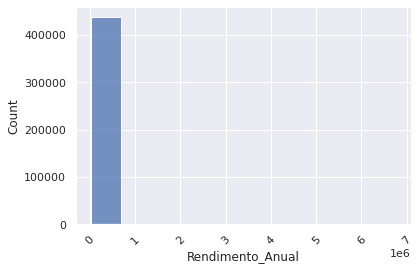

In [ ]:
sns.histplot(data=dados_cad_id_unicos, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

Os *outliers* (para cima) distorcem nossa informação de tal maneira que o restante dos dados ficam concentrados em uma barra única.

Vamos verificar como fica o *boxplot* dessa mesma variável.

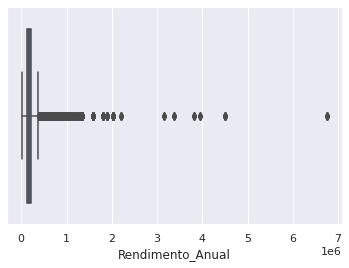

In [ ]:
sns.boxplot(x=dados_cad_id_unicos.Rendimento_Anual)

Claramente precisamos tratar esses *outliers* para não penalizar o nosso futuro modelo de decisão. Se trabalhamos com dados com muitos *outliers* vamos tender a ter *overfit*, ou seja, um modelo que vai funcionar muito bem no treino mas terá uma performance fraca em produção.

Vamos estabelecer o limite para separar os *outliers* como sendo a média e dois desvios-padrão para cada lado.

In [ ]:
renda = dados_cad_id_unicos.Rendimento_Anual
renda_med = renda.mean()
renda_std = renda.std()

renda_lim_sup = renda_med + 2 * renda_std
renda_lim_inf = renda_med - 2 * renda_std

renda_outliers = []

for index, valor in renda.items():
    if valor > renda_lim_sup or valor < renda_lim_inf:
        renda_outliers.append(index)

len(renda_outliers)

12641

In [ ]:
dados_cad_sem_outliers = dados_cad_id_unicos.drop(renda_outliers)
dados_cad_sem_outliers.shape

(425822, 18)

In [ ]:
# Maneira Alternativa
# Já gera os dataframes separados sem outliers e só de outliers

df_renda_outliers = dados_cad_id_unicos.query('Rendimento_Anual > @renda_lim_sup or Rendimento_Anual < @renda_lim_inf')
print(df_renda_outliers.shape)

df_renda_sem_outliers = dados_cad_id_unicos.query('Rendimento_Anual <= @renda_lim_sup and Rendimento_Anual >= @renda_lim_inf')
print(df_renda_sem_outliers.shape)

(12641, 18)
(425822, 18)


In [ ]:
dados_cad_sem_outliers[cols_quantitativas].describe()

,Idade,Qtd_Filhos,Anos_empregado,Tamanho_Familia,Rendimento_Anual
count,"425,822.00","425,822.00","425,822.00","425,822.00","425,822.00"
mean,43.84,0.43,5.74,2.19,"176,384.73"
std,11.53,0.72,6.74,0.90,"75,033.53"
min,21.00,0.00,-1.00,1.00,"26,100.00"
25%,34.00,0.00,1.00,2.00,"117,000.00"
50%,43.00,0.00,4.00,2.00,"157,500.00"
75%,53.00,1.00,8.50,3.00,"225,000.00"
max,69.00,19.00,48.00,20.00,"405,000.00"


Rodando agora o **`describe`** de nosso *dataset* podemos observar que as informações de rendimento anual não estão mais em notação científica, já estão sendo apresentados como números com formatação normal.

Vamos verificar como fica o histograma desses dados.

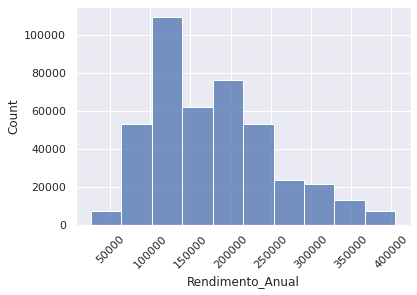

In [ ]:
sns.histplot(data=dados_cad_sem_outliers, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

Temos agora uma melhor distribuição dos clientes nas 10 barras do histograma, com uma certa concentração mais à esquerda do gráfico. Isso já é esperado, pois normalmente temos mais pessoas ganhando menos e poucas pessoas com maiores rendimentos.

Vamos analisar da mesma forma a idade dos nossos clientes.

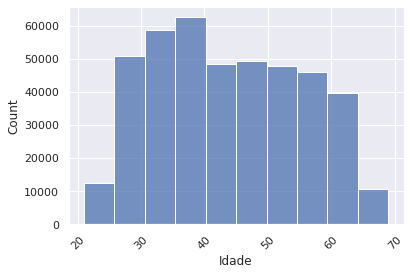

In [ ]:
sns.histplot(data=dados_cad_sem_outliers, x='Idade', bins=10)
plt.xticks(rotation=45)
plt.show()

Podemos perceber uma distribuição regular das idades dos clientes, sem concentrações significativas em nenhuma faixa etária específica. Temos apenas um pouco mais de clientes entre os 30 e 40 anos, mas isso está de acordo com a pirâmide populacional.

Vamos analisar o tempo de empresa, mas para isso vamos desconsiderar aqueles clientes pensionistas que deixamos com o valor de -1.

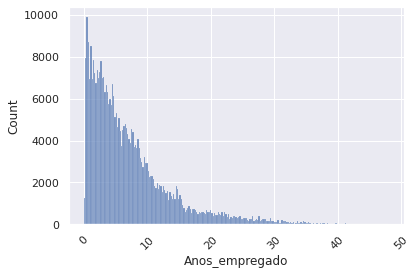

In [ ]:
sns.histplot(data=dados_cad_sem_outliers.query('Anos_empregado >=0'), x='Anos_empregado')
plt.xticks(rotation=45)
plt.show()

Podemos observar que a grande maioria dos clientes está na faixa de 0 - 10 anos de empresa.

#### **Desafio 3 - Explorar Outras Técnicas de Identificar e Tratar** ***Outliers***
---

> z-score
> 


Uma das maneiras de se identificar *outliers* é usando o **`zscore`**, presente na biblioteca **`scipy.stats`**.

O [**`zscore`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html) nos retorna quantos desvios-padrão o nosso dado está da média de valores do nosso conjunto de dados. Para obter o mesmo efeito que tivemos acima, deveríamos desprezar todos os dados que tivessem valor absoluto acima de 2.

In [ ]:
from scipy import stats
stats.zscore(dados_cad_id_unicos.Rendimento_Anual)

array([ 2.17997265,  2.17997265, -0.68150387, ..., -1.21292093,
       -1.04940799, -0.59974739])

In [ ]:
dados_desafio_3 = dados_cad_id_unicos.copy()
dados_desafio_3['zscore_renda'] = abs(stats.zscore(dados_cad_id_unicos.Rendimento_Anual))
dados_desafio_3_sem_outliers = dados_desafio_3[dados_desafio_3.zscore_renda <= 2].drop('zscore_renda', axis=1)
dados_desafio_3_sem_outliers.shape

(425822, 18)

Como pode ser visto pelas dimensões do *dataset* resultante, o resultado foi o mesmo do obtido anteriormente, durante a aula.

Encontrei também algumas funções para tratamento de *outliers* que copiei abaixo.

Essa primeira deve ser executada para cada coluna que desejamos limpar de nosso *dataframe*. Ela considera como limites para tratar um dado como *outlier* os extremos de um *boxplot* e exclui da base todas as linhas que contiverem *outliers*.

In [ ]:
# https://www.ti-enxame.com/pt/python/detectar-e-excluir-outliers-no-dataframe-do-pandas/1046331960/
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
# Deve ser executada para cada coluna que desejamos limpar
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

Essa segunda função é executada uma única vez para todo o *dataframe*. A diferença aqui é no tratamento dado. Caso ela encontre algum *outlier*, a função substitui o valor pela mediana daquela coluna.

In [ ]:
# https://www.ti-enxame.com/pt/python/detectar-e-excluir-outliers-no-dataframe-do-pandas/1046331960/
#------------------------------------------------------------------------------
# Outlier Treatment
# Substitui os dados outliers pela mediana
# Executa para todas as colunas do dataframe
#------------------------------------------------------------------------------
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

Por último, [aqui](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba) temos um artigo interessante sobre o assunto.

### **Vídeo 3 - Variáveis Categóricas**

Vamos agora analisar as variáveis categóricas de nosso *dataset*.

In [ ]:
cols_categoricas = ['Genero', 'Tem_Carro', 'Tem_Casa_Propria', 'Tem_email',
                    'Estado_Civil', 'Tem_Celular','Tem_telefone_trabalho',
                    'Tem_telefone_fixo','Categoria_de_renda', 'Ocupacao',
                    'Grau_Escolaridade','Moradia']

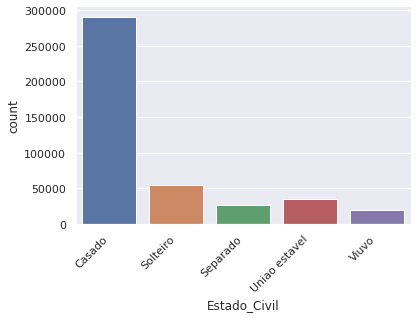

In [ ]:
sns.countplot(x = 'Estado_Civil', data=dados_cad_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()

Temos uma forte predominância de **Casados**, mas ainda temos uma certa participação dos demais tipos de estado civil em nossa base.

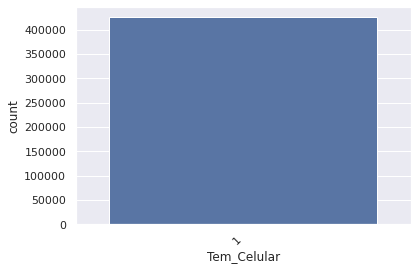

In [ ]:
sns.countplot(x = 'Tem_Celular', data=dados_cad_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()

Como já tínhamos visto no desafio da aula anterior, 100% de nossos clientes declararam ter celular, tornando essa variável irrelevante para o nosso modelo.

Assim, ela pode ser descartada e simplificar o treinamento do modelo mais adiante.

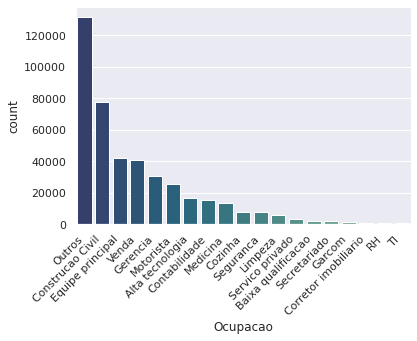

In [ ]:
sns.countplot(x = 'Ocupacao', data=dados_cad_sem_outliers,
              order=dados_cad_sem_outliers['Ocupacao'].value_counts().index,
              palette = 'crest_r')
plt.xticks(rotation=45, ha='right')
plt.show()

Muitos clientes declararam a ocupação como **Outros**, isso chama a atenção.

Para analisar esse grupo, podemos verificar como eles se comportam em relação à renda anual.

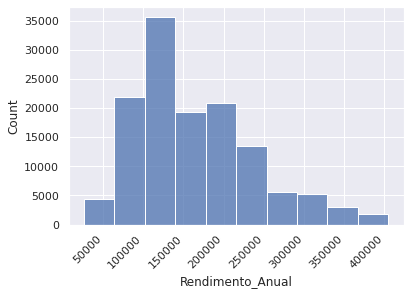

In [ ]:
sns.histplot(data=dados_cad_sem_outliers.query('Ocupacao == "Outros"'), x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45, ha='right')
plt.show()

 A distribuição da renda é muito semelhante à que obtivemos quando analisamos o *dataset* inteiro, apenas em uma escala de quantidades diferentes. Isso nos indica que não há uma concentração em alguma categoria que foi esquecida de relacionar nas opções de ocupação de nossa base de dados.

 Tenho uma suspeita de que a maior parte desses outros devem ser os pensionistas que já vimos anteriormente, vamos confirmar.

In [ ]:
dados_cad_sem_outliers.query('Ocupacao == "Outros"')['Categoria_de_renda'].value_counts()

Pensionista            74479
Empregado              35178
Associado comercial    15762
Servidor publico        5971
Estudante                  5
Name: Categoria_de_renda, dtype: int64

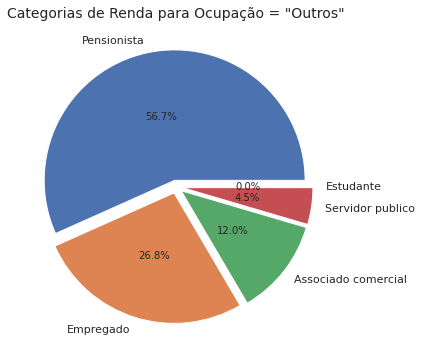

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = dados_cad_sem_outliers.query('Ocupacao == "Outros"')['Categoria_de_renda'].value_counts().keys()
plt.pie(x=dados_cad_sem_outliers.query('Ocupacao == "Outros"')['Categoria_de_renda'].value_counts(), autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title('Categorias de Renda para Ocupação = "Outros"', fontsize=14);

In [ ]:
dados_cad_sem_outliers.query('Categoria_de_renda == "Pensionista"')['Ocupacao'].value_counts()

Outros                74479
Construcao Civil         31
Equipe principal         31
Gerencia                 15
Motorista                11
Medicina                 10
Venda                     8
Alta tecnologia           6
Contabilidade             5
Cozinha                   5
Seguranca                 2
Secretariado              2
Baixa qualificacao        1
Name: Ocupacao, dtype: int64

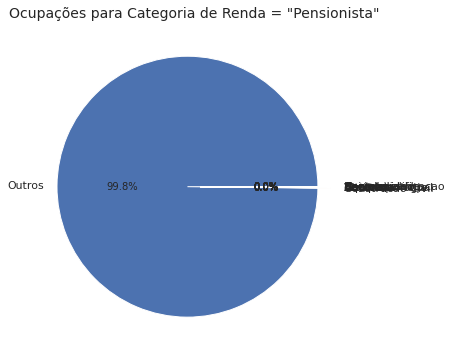

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
labels = dados_cad_sem_outliers.query('Categoria_de_renda == "Pensionista"')['Ocupacao'].value_counts().keys()
plt.pie(x=dados_cad_sem_outliers.query('Categoria_de_renda == "Pensionista"')['Ocupacao'].value_counts(),
        autopct="%.1f%%", explode=[0.05]*len(dados_cad_sem_outliers.query('Categoria_de_renda == "Pensionista"')['Ocupacao'].value_counts()),
        labels=labels, pctdistance=0.5)
plt.title('Ocupações para Categoria de Renda = "Pensionista"', fontsize=14);

Como podemos ver acima, mais da metade dos **Outros** são **Pensionistas**. E praticamente todos os **Pensionistas** estão classificados como **Outros**, confirmando parcialmente minha hipótese.

---
>Nesse momento a Karol fez uma explanação a respeito da regulamentação que o Banco Central (BaCen) impõe sobre os modelos de *credit score*.
>
>Dentro dessa regulamentação o BaCen determina algumas informações que não podem ser consideradas, as chamadas **Informações Sensíveis**. São elas:
>* Origem Social e Étnica
>* Condições de Saúde
>* Informação Genética
>* Orientação Sexual
>* Convicções Políticas, Religiosas e Filosóficas
---

Em função disso, além da coluna **`Tem_Celular`** que já havíamos decidido eliminar por não influenciar nosso modelo, por uma exigência legal também precisamos eliminar a coluna **`Genero`**.

In [ ]:
dados_cad_tratamento1 = dados_cad_sem_outliers.drop(['Genero', 'Tem_Celular'], axis=1)
dados_cad_tratamento1.shape

(425822, 16)

In [ ]:
cols_categoricas.remove('Genero')
cols_categoricas.remove('Tem_Celular')
cols_categoricas

['Tem_Carro',
 'Tem_Casa_Propria',
 'Tem_email',
 'Estado_Civil',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Categoria_de_renda',
 'Ocupacao',
 'Grau_Escolaridade',
 'Moradia']

#### **Desafio 4 - Criar uma Função para Gerar os Gráficos**
---


In [ ]:
def graf_quants(dados, lista):
    linhas = round((len(lista)+ 0.45) / 2 )
    fig, ax = plt.subplots(nrows=linhas, ncols=2, figsize=(12,8))
    fig.suptitle('Variáveis Quantitativas', fontsize=20, fontweight='bold')
    loc_graf_x = 0
    loc_graf_y = 0
    for var in lista:
        ax[loc_graf_x, loc_graf_y] = sns.boxplot(x=dados[var], ax=ax[loc_graf_x, loc_graf_y])
        ax[loc_graf_x, loc_graf_y].set_title(var, fontsize=16, fontweight='bold')
        ax[loc_graf_x, loc_graf_y].set_xlabel('')

        plt.draw()
        xlabels = ax[loc_graf_x, loc_graf_y].get_xticklabels()
        ax[loc_graf_x, loc_graf_y].set_xticklabels(xlabels, rotation=45, ha='right')
        
        if loc_graf_y == 0:
            loc_graf_y = 1
        else:
            loc_graf_y = 0
            loc_graf_x += 1
    plt.subplots_adjust(wspace=0.2,
                        hspace=0.65)

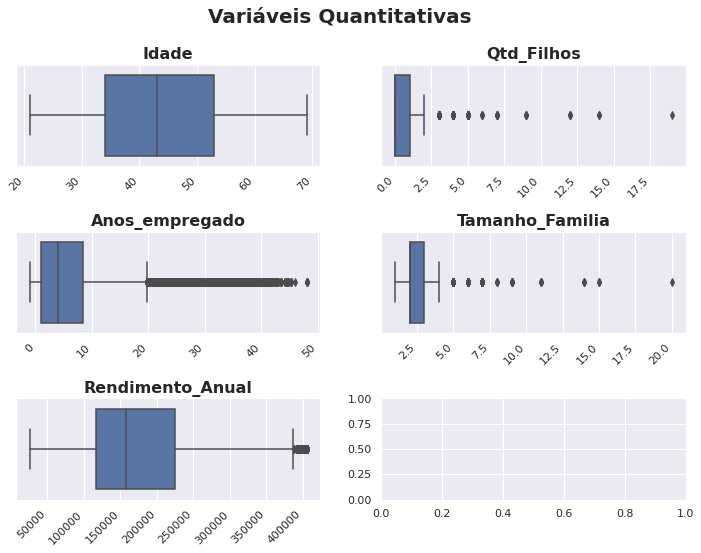

In [ ]:
graf_quants(dados_cad_sem_outliers, cols_quantitativas)

In [ ]:
def graf_categs(dados, lista):
    #linhas = round((len(lista)+ 0.5) / 3 )
    linhas = round((len(lista)+ 0.45) / 4 )
    #fig, ax = plt.subplots(nrows=linhas, ncols=3, figsize=(21,10))
    fig, ax = plt.subplots(nrows=linhas, ncols=4, figsize=(21,10))
    fig.suptitle('Variáveis Categóricas', fontsize=20, fontweight='bold')
    loc_graf_x = 0
    loc_graf_y = 0
    for var in lista:
        ax[loc_graf_x, loc_graf_y] = sns.countplot(x=dados[var], ax=ax[loc_graf_x, loc_graf_y],
                                                   order=dados[var].value_counts().index,
                                                   palette='crest_r')
        ax[loc_graf_x, loc_graf_y].set_title(var, fontsize=16, fontweight='bold')
        ax[loc_graf_x, loc_graf_y].set_xlabel('')

        plt.draw()
        xlabels = ax[loc_graf_x, loc_graf_y].get_xticklabels()
        ax[loc_graf_x, loc_graf_y].set_xticklabels(xlabels, rotation=45, ha='right', fontsize=10)
        
        if loc_graf_y != 3:
            loc_graf_y += 1
        else:
            loc_graf_y = 0
            loc_graf_x += 1

    plt.subplots_adjust(wspace=0.3,
                        hspace=1.)

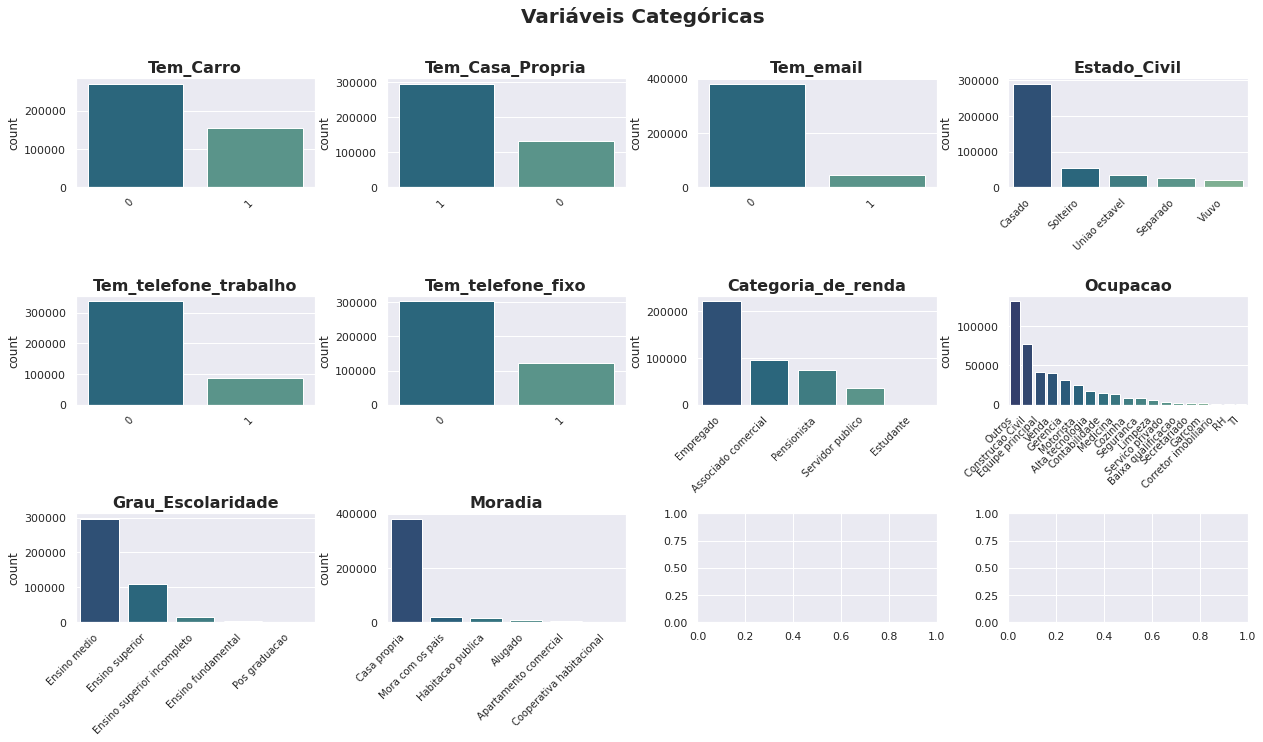

In [ ]:
graf_categs(dados_cad_sem_outliers, cols_categoricas)

#### **Desafio 5 - Continuar a Análise Exploratória**
---

Complementei a análise exploratória ao longo do *notebook*, para ficar mais fácil de pegar o contexto.

Aqui vou apenas fazer algumas comparações do rendimento médio com outros atributos, como Ocupação, Grau de Escolaridade, Categoria de Renda e Tipo de Moradia.

In [ ]:
print(color.BOLD+color.BLUE+color.UNDERLINE+'--- Rendimento Médio por Ocupação e Escolaridade ---'+color.END)

dados_cad_sem_outliers.pivot_table(values='Rendimento_Anual', index=['Ocupacao'],
               columns=['Grau_Escolaridade'], aggfunc=lambda x: round(x.mean()),
               fill_value=0, margins='All', margins_name='TOTAL').astype(float)

--- Rendimento Médio por Ocupação e Escolaridade ---


Grau_Escolaridade,Ensino fundamental,Ensino medio,Ensino superior,Ensino superior incompleto,Pos graduacao,TOTAL
Ocupacao,,,,,,
Alta tecnologia,"190,446.00","173,075.00","202,409.00","199,563.00",0.00,"185,909.00"
Baixa qualificacao,"130,623.00","149,050.00","184,100.00","131,344.00",0.00,"149,633.00"
Construcao Civil,"173,317.00","172,738.00","192,990.00","187,695.00","220,109.00","175,829.00"
Contabilidade,"169,296.00","181,211.00","206,130.00","200,204.00","236,250.00","197,032.00"
Corretor imobiliario,0.00,"219,106.00","222,983.00","190,000.00",0.00,"218,561.00"
Cozinha,"130,271.00","152,875.00","175,514.00","165,125.00",0.00,"154,713.00"
Equipe principal,"167,042.00","167,711.00","191,913.00","179,923.00","232,816.00","180,334.00"
Garcom,"156,150.00","150,481.00","173,543.00","165,205.00",0.00,"154,328.00"
Gerencia,"200,212.00","215,691.00","244,182.00","236,969.00","198,519.00","231,583.00"


É interessante observar a variação do rendimento médio de acordo com o aumento do grau de escolaridade.

Apesar de, em média, termos o crescimento do rendimento com o aumento do grau de escolaridade, isso não é a regra para todas as ocupações, como podemos ver em ***TI*** e ***Alta Tecnologia***, por exemplo.

In [ ]:
print(color.BOLD+color.BLUE+color.UNDERLINE+'--- Rendimento Médio por Ocupação e Categoria de Renda ---'+color.END)

dados_cad_sem_outliers.pivot_table(values='Rendimento_Anual', index=['Ocupacao'],
               columns=['Categoria_de_renda'], aggfunc=lambda x: round(x.mean()),
               fill_value=0, margins='All').astype(float)

--- Rendimento Médio por Ocupação e Categoria de Renda ---


Categoria_de_renda,Associado comercial,Empregado,Estudante,Pensionista,Servidor publico,All
Ocupacao,,,,,,
Alta tecnologia,"201,859.00","177,002.00",0.00,"187,500.00","193,840.00","185,909.00"
Baixa qualificacao,"161,410.00","146,898.00",0.00,"157,500.00","195,000.00","149,633.00"
Construcao Civil,"186,751.00","171,763.00","133,500.00","170,565.00","188,218.00","175,829.00"
Contabilidade,"209,948.00","190,000.00",0.00,"211,500.00","182,659.00","197,032.00"
Corretor imobiliario,"224,024.00","213,063.00",0.00,0.00,"237,500.00","218,561.00"
Cozinha,"177,382.00","148,545.00",0.00,"127,615.00","143,573.00","154,713.00"
Equipe principal,"193,653.00","170,294.00","177,000.00","199,887.00","188,241.00","180,334.00"
Garcom,"178,607.00","143,530.00",0.00,0.00,"140,972.00","154,328.00"
Gerencia,"249,036.00","219,331.00",0.00,"230,700.00","226,645.00","231,583.00"


In [ ]:
print(color.BOLD+color.BLUE+color.UNDERLINE+'--- Rendimento Médio por Tipo de Moradia ---'+color.END)

dados_cad_sem_outliers.pivot_table(values='Rendimento_Anual', index=['Moradia'],
               columns=['Tem_Casa_Propria'], aggfunc=lambda x: round(x.mean()),
               fill_value=0, margins='All').astype(float)

--- Rendimento Médio por Tipo de Moradia ---


Tem_Casa_Propria,0,1,All
Moradia,,,
Alugado,"179,300.00","184,951.00","181,885.00"
Apartamento comercial,"194,221.00","194,669.00","194,454.00"
Casa propria,"173,108.00","177,564.00","176,329.00"
Cooperativa habitacional,"177,821.00","176,608.00","177,034.00"
Habitacao publica,"176,610.00","184,176.00","179,725.00"
Mora com os pais,"167,031.00","173,899.00","169,711.00"
All,"173,251.00","177,777.00","176,385.00"


In [ ]:
print(color.BOLD+color.BLUE+color.UNDERLINE+'--- Quantidade de Clientes por Tipo de Moradia ---'+color.END)

dados_cad_sem_outliers.pivot_table(values='ID_Cliente', index=['Moradia'],
               columns=['Tem_Casa_Propria'], aggfunc='count',
               fill_value=0, margins='All').astype(float)

--- Quantidade de Clientes por Tipo de Moradia ---


Tem_Casa_Propria,0,1,All
Moradia,,,
Alugado,"3,163.00","2,667.00","5,830.00"
Apartamento comercial,"1,766.00","1,922.00","3,688.00"
Casa propria,"106,005.00","276,329.00","382,334.00"
Cooperativa habitacional,523.00,964.00,"1,487.00"
Habitacao publica,"8,135.00","5,693.00","13,828.00"
Mora com os pais,"11,376.00","7,279.00","18,655.00"
All,"130,968.00","294,854.00","425,822.00"


As duas últimas tabelas chamam a atenção para uma aparente contradição.

Vários clientes (quase 20 mil) que declararam possuir casa própria também declararam que moram em local alugado, com os pais ou outras modalidades diferentes de casa própria.

E vários clientes (mais de 100 mil) que declararam morar em casa própria mas também declararam que não a possuem.

#### **O que aprendemos nessa aula?**
---

>* **Variáveis Contínuas:**
>
>  * Identificar e Diferenciar Variáveis Contínuas, Categóricas Binárias e Categóricas Não Binárias;
>  * Tratamento de *Outliers*.
>
>* **Variáveis Categóricas:**
>
>  * Visualizar a distribuição de algumas variáveis categóricas através de histogramas;
>  * Limitações legais para um modelo de crédito.
---












## **Aula 03 - Definindo a Classificação de Clientes**
---


### **Vídeo 1 - Conhecendo a Base** ***Target***

Vamos começar a analisar agora a base de clientes aprovados.

In [ ]:
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [ ]:
dados_aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
for var in dados_aprovados.columns:
    print(color.BOLD+var,'-',len(np.sort(dados_aprovados[var].unique())),
          'Valores Únicos:'+color.END, str(np.sort(dados_aprovados[var].unique()))+'\n')

ID_Cliente - 45985 Valores Únicos: [5001711 5001712 5001713 ... 5150484 5150485 5150487]

Mes_referencia - 61 Valores Únicos: [-60 -59 -58 -57 -56 -55 -54 -53 -52 -51 -50 -49 -48 -47 -46 -45 -44 -43
 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25
 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7
  -6  -5  -4  -3  -2  -1   0]

Faixa_atraso - 8 Valores Únicos: ['1-29 dias' '120-149 dias' '30-59 dias' '60-89 dias' '90-119 dias'
 '>150 dias' 'nenhum empréstimo' 'pagamento realizado']



Podemos observar que temos pouco menos de 46 mil clientes (enquanto na base de cadastrados temos mais de 425 mil), ou seja, nem todos os clientes cadastrados tiveram empréstimos aprovados (ou nem solicitaram).

Em relação ao **`Mes_referencia`** temos os valores variando entre 0 e -60.

Em relação à **`Faixa_atraso`** temos 8 classificações, sendo 6 relacionadas a pagamentos em atraso (1 a 5 meses e acima de 5 meses), uma de pagamento realizado e uma de "nenhum empréstimo".

Vamos investigar um cliente único para ver como os dados se comportam.

In [ ]:
dados_aprovados.query('ID_Cliente == 5001712')

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


Temos um bom histórico, de mais de um ano de pagamento de parcelas. Algumas foram pagas em dia e outras, em atraso.

Vamos analisar um outro cliente, o **5001711**.

In [ ]:
dados_aprovados.query('ID_Cliente == 5001711')

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


Nesse caso nosso histórico é bem menor, apenas 4 meses.

Além disso, não fica claro se a parcela do mês -1 já foi paga ou ainda está em aberto.

De qualquer forma, as informações ainda são insuficientes para classificar um cliente como bom ou mau pagador.

### **Vídeo 2 - Criando Medidas Auxiliares**

A partir dos dados que temos nesse *dataset* vamos criar algumas variáveis auxiliares que irão nos ajudar a montar o modelo de decisão mais adiante.

A primeira variável é o mês de abertura do crédito, que vai ser o menor valor encontrado na variável **`Mes_referencia`** de cada cliente.

In [ ]:
ser_abertura = dados_aprovados.groupby('ID_Cliente').apply(lambda x: min(x['Mes_referencia']))
ser_abertura.name = 'Abertura'

In [ ]:
dados_aprovados = dados_aprovados.merge(ser_abertura, on='ID_Cliente')
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


A próxima variável que iremos criar é a data final do empréstimo, que para a grande maioria deverá ser o mês atual (0), mas podemos ter clientes que já quitaram seu empréstimo e pararam de ter atualizações.

Para isso vamos buscar o maior valor de cada cliente para a variável **`Mes_referencia`**.

In [ ]:
ser_final = dados_aprovados.groupby('ID_Cliente').apply(lambda x: max(x['Mes_referencia']))
ser_final.name = 'Final'

In [ ]:
dados_aprovados = dados_aprovados.merge(ser_final, on='ID_Cliente')
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


Tendo os meses de abertura e final de cada cliente, vamos calcular a janela de acompanhamento, ou seja, quantos meses de informações temos de cada cliente.

In [ ]:
dados_aprovados['Janela'] = dados_aprovados['Final'] - dados_aprovados['Abertura']
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


Vamos agora criar uma variável para armazenar a informação de *Months on Book* (MOB), que é uma métrica utilizada para acompanhar o número de meses que um empréstimo consta na contabilidade do banco que o concedeu.

In [ ]:
dados_aprovados['MOB'] = dados_aprovados['Mes_referencia'] - dados_aprovados['Abertura']
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


Vamos converter os dados referentes à faixa de atraso de cada parcela para dados numéricos, de forma a permitir o uso por modelos de *machine learning*.

In [ ]:
dict_faixa_atraso_ind ={'nenhum empréstimo': 0, 'pagamento realizado': 1,
                        '1-29 dias': 2, '30-59 dias': 3, '60-89 dias': 4,
                        '90-119 dias': 5, '120-149 dias': 6, '>150 dias': 7}

In [ ]:
dados_aprovados['Ind_Faixa_atraso'] = dados_aprovados['Faixa_atraso'].map(dict_faixa_atraso_ind)
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


Agora vamos criar uma classificação inicial do que seria um mau pagador e armazenar essa informação em uma coluna **`Mau`**.

Inicialmente vamos classificar como mau pagador aquelas parcelas que tiverem 60 ou mais dias de atraso, ou seja, o indicador de faixa de atraso superior a 3.

In [ ]:
dados_aprovados['Mau'] = dados_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] > 3 else 0, axis=1)
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0


### **Vídeo 3 - Análise** ***Vintage***

Agora vamos utilizar as variáveis auxiliares que foram criadas no vídeo anterior para gerar alguns *dataframes* que nos possibilitarão analisar melhor nossos dados.

Primeiro vamos isolar as variáveis que são iguais para todas as parcelas dos empréstimos de cada cliente, as que são referente a informações cadastrais.
* **`Abertura:`** quantos meses atrás foi aberta a conta
* **`Final:`** quantos meses atrás foi encerrada a conta
* **`Janela:`** tempo de permanência da conta

In [ ]:
dados_creditos_id = dados_aprovados[['ID_Cliente', 'Abertura', 'Final', 'Janela']].groupby('ID_Cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)
dados_creditos_id

,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


Usando o *dataframe* criado, vamos contar quantos clientes abriram conta em cada mês, para depois poder criar estatísticas de quantos desses clientes se tornaram maus pagadores.

In [ ]:
df_denominador = dados_creditos_id.groupby('Abertura').apply(lambda x: x['ID_Cliente'].count()).reset_index()
df_denominador.columns = ['Abertura', 'Qtd_Clientes']
df_denominador

,Abertura,Qtd_Clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


Precisamos criar a estrutura do *dataframe vintage* que também será usado para analisar estatísticas de maus pagadores.

Precisamos da **`Abertura`** e **`MOB`** para depois aproveitarmos as quantidades de clientes que abriram a conta em cada mês de abertura que calculamos acima.

In [ ]:
df_vintage = dados_aprovados.groupby(['Abertura','MOB']).apply(lambda x: x['ID_Cliente'].count()).reset_index()
df_vintage.columns = ['Abertura', 'MOB', 'Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


Com a estrutura montada, vamos buscar as quantidades de contas abertas em cada mês de abertura para usar como denominador na nossa divisão que irá calcular a taxa de maus pagadores. Essas quantidades já foram calculadas no **`df_denominador`**, vamos substituir na coluna **`Qtd_Clientes`**.

In [ ]:
df_vintage = pd.merge(df_vintage[['Abertura', 'MOB']], df_denominador, on = ['Abertura'], how='left')
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686


Agora vamos buscar em nosso *dataset* de créditos aprovados quantos mau pagadores tivemos em cada combinação de **`Abertura`** e **`MOB`** e calcular a taxa de maus pagadores dividindo esse número pela quantidade de clientes que abriram a conta naquele mês.

Essa parte do código é um pouco mais complexa, por isso vou explicar passo a passo o que está sendo feito.

1. Como estaremos visualizando números percentuais bem baixos, vamos voltar o formato de exibição de números de ponto flutuante para 6 dígitos depois da vírgula
1. Vamos criar a coluna **`Qtd_Mau`** onde armazenaremos a quantidade de maus pagadores únicos, acumulando a cada mês que passa. Na criação preenchemos todas as linhas com *NaN* (*Not A Number*)
1. Vamos passar por todos os registros de nossa base de créditos aprovados, variando o **`j`** (que vai ser a **`Abertura`**) de -60 até 0 e variando o **`i`** (que vai ser o **`MOB`**) de 0 até 60
1. A cada combinação de **`Abertura`** e **`MOB`** o *loop* vai colocar a lista de maus pagadores na lista **`ls`**, verificar quais são os clientes únicos e colocar em nosso *dataset* **`df_vintage`**
 * é necessário verificar os clientes únicos pois um cliente pode ter pago em atraso 2 parcelas diferentes mas só deve ser contado uma vez
 * a contagem é cumulativa para uma mesma **`Abertura`**, para que tenhamos ao final do último **`MOB`** a quantidade de clientes que, em algum momento, atrasou uma parcela
1. A cada troca de **`j`** (ou **`Abertura`**) a lista é reiniciada
1. Ao final do *loop* criamos uma nova coluna, **`Taxa_de_Mau`**, que é a divisão da quantidade de clientes considerados maus pagadores pela quantidade total de clientes naquela combinação de **`Abertura`** e **`MOB`**

In [ ]:
pd.options.display.float_format = '{:,.6f}'.format

df_vintage['Qtd_Mau'] = np.nan

for j in range(-60,1):
    ls = [] # reinicia a lista de clientes maus pagadores para uma nova Abertura
    for i in range(0,61):
        due = list(dados_aprovados.query('Mau == 1 and MOB == @i and Abertura == @j')['ID_Cliente']) # armazena os IDs dos clientes maus pagadores
        ls.extend(due) # agrega à lista acumulada de maus pagadores
        df_vintage.loc[(df_vintage['MOB'] == i) & (df_vintage['Abertura'] == j), 'Qtd_Mau'] = len(set(ls)) # conta quantos IDs únicos temos na lista e coloca na coluna Qtd_Mau

df_vintage['Taxa_de_Mau'] = df_vintage['Qtd_Mau'] / df_vintage['Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes,Qtd_Mau,Taxa_de_Mau
0,-60,0,415,0.000000,0.000000
1,-60,1,415,0.000000,0.000000
2,-60,2,415,0.000000,0.000000
3,-60,3,415,0.000000,0.000000
4,-60,4,415,0.000000,0.000000
...,...,...,...,...,...
1886,-2,1,771,0.000000,0.000000
1887,-2,2,771,1.000000,0.001297
1888,-1,0,686,0.000000,0.000000
1889,-1,1,686,0.000000,0.000000


Para facilitar a visualização e o entendimento de nossos dados, vamos transformar nosso *dataframe* em uma tabela, com os meses de abertura de contas nas linhas e os MOBs nas colunas, com nossa taxa de maus pagadores como dados dessa tabela.

In [ ]:
df_vintage_pivot = df_vintage.pivot(index='Abertura',
                                    columns = 'MOB',
                                    values='Taxa_de_Mau')
df_vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-60,0.000000,0.000000,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,0.009639,0.012048,0.014458,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.019277,0.019277,0.019277,0.019277,0.021687,0.021687,0.021687,0.021687,0.024096,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.000000,0.000000,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,0.012315,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.022167,0.024631,0.024631,0.027094,0.027094,0.027094,0.027094,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,nan
-58,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,0.011364,0.013636,0.013636,0.013636,0.013636,0.013636,0.013636,0.015909,0.018182,0.018182,0.018182,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,nan,nan
-57,0.000000,0.000000,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,0.007500,0.007500,0.010000,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.022500,0.022500,0.022500,0.022500,0.022500,0.022500,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,nan,nan,nan
-56,0.000000,0.000000,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,0.021277,0.025532,0.029787,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.000000,0.000000,0.000000,0.003432,0.003432,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
-3,0.000000,0.000000,0.001088,0.001088,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
-2,0.000000,0.000000,0.001297,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n

Podemos perceber que a diagonal inferior direita da tabela permanece com valores *NaN*, uma vez que são referentes a períodos dos quais não temos informações. Por exemplo, o 3º mês de uma conta que foi aberta há 2 meses.

Vamos agora plotar as informações dessa tabela para visualizar o comportamento desses clientes inadimplentes. Como o gráfico com 60 linhas ficaria muito poluído, vamos selecionar apenas 10 meses de abertura para essa visualização.

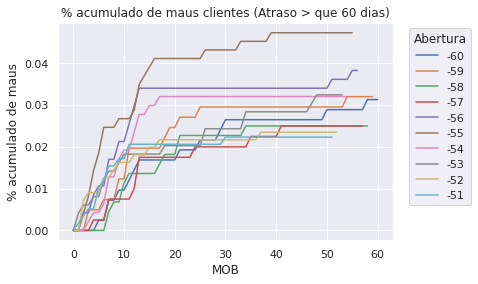

In [ ]:
lst = [i for i in range(0,61)]
df_vintage_pivot[lst].T.iloc[:,:10].plot(legend = True, grid = True, title = '% acumulado de maus clientes (Atraso > que 60 dias)')

plt.xlabel('MOB')
plt.ylabel('% acumulado de maus')
plt.legend(bbox_to_anchor=(1.25, 1), title='Abertura')
plt.show()

Podemos perceber que os gráficos se comportam de maneira semelhante para os diferentes períodos de abertura das contas.

Temos um aumento rápido inicial que perdura até por volta do 12º mês e depois os percentuais de maus pagadores se comportam de maneira mais horizontal, com pequenos degraus em pontos específicos.

Isso indica que temos a definição do comportamento de um cliente (se ele é um mau pagador ou não), geralmente, até o final do primeiro ano.

Vamos verificar agora se temos pelo menos um ano de informações de clientes para saber se poderemos levar nossa análise adiante de forma consistente.

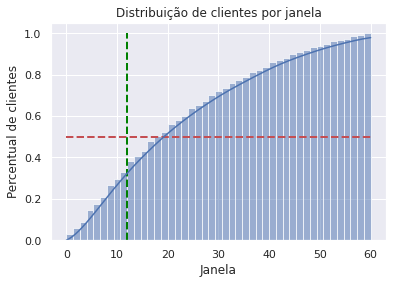

In [ ]:
sns.histplot(data=dados_creditos_id, x='Janela', cumulative=True, stat='density', kde=True)
plt.hlines(y=0.5, xmin=0, xmax=60, colors='r', ls='--', lw=2)
plt.vlines(x=12, ymin=0, ymax=1, colors='green', ls='--', lw=2)
plt.title('Distribuição de clientes por janela')
plt.xlabel('Janela')
plt.ylabel('Percentual de clientes')
plt.show()

Como podemos ver, a curva acumulada de clientes corta os 50% (linha vermelha) próximo à janela de 20 meses, ou seja, temos mais de 50% de clientes com mais de 12 meses de informação.

Para referência, a linha verde marca os 12 meses, onde temos menos de 40% dos clientes acumulados.

Vamos agora converter a nossa coluna de indicativo de faixa de atraso do pagamento para diversas colunas, que possam ser tratadas de forma binária (0 e 1) como indicativo dos maus pagadores.

In [ ]:
dict_intervalo_atraso = {'maior_30_dias': 3, 'maior_60_dias': 4, 'maior_90_dias': 5,
                        'maior_120_dias': 6, 'maior_150_dias': 7}

In [ ]:
for chave, valor in dict_intervalo_atraso.items():
  dados_aprovados[f'Mau_{chave}'] = dados_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] >= valor else 0, axis=1) # mais de 60
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0


Vamos repetir o que fizemos antes, de calcular a taxa de maus pagadores, com algumas alterações.

Antes calculamos para cada combinação de **`Abertura`** e **`MOB`**, agora vamos fazer isso somente considerando o **`MOB`**. E, em vez de calcular somente para aqueles com mais de 60 dias de atraso, vamos usar a estrutura que acabamos de montar para calcular as taxas para mais de 30, 60, 90, 120 e 150 dias de atraso.

Desta vez os comentários de cada passo estão diretamente no código, para facilitar o entendimento.

In [ ]:
dados_aprovados.query(f'Mau_maior_150_dias == 1').groupby('ID_Cliente')['MOB'].min().reset_index()

,ID_Cliente,MOB
0,5003804,12
1,5004559,7
2,5004891,9
3,5005205,58
4,5008827,14
...,...,...
190,5149190,2
191,5149192,2
192,5149828,9
193,5149834,12


In [ ]:
dict_taxa_mau = {} # Inicializa o dicionário
id_sum = len(set(dados_aprovados['ID_Cliente'])) # Armazena o total de clientes únicos da base de empréstimos

for chave in dict_intervalo_atraso.keys(): # Executa para cada uma das colunas de tempos de atraso
  # Seleciona os clientes da faixa de atraso e o MOB em que entraram nessa faixa  
  df_min_mau = dados_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  # Inicializa o dataframe que vai armazenar as taxas dessa coluna
  df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})
  lst = [] # Inicializa a lista que vai armazenar os clientes para cada MOB
  for i in range(0,61): # Executa a varredura para cada MOB
      # Armazena a lista de clientes maus pagadores do MOB corrente
      due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
      lst.extend(due) # Acrescenta na lista para acumular os maus pagadores
      # Calcula a taxa de maus pagadores dividindo a quantidade de maus pagadores únicos pelo total de clientes da base
      df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst)) / id_sum
  # Joga o resultado dessa coluna de tempo de atraso para o dicionário que armazena todos os resultados
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']

# Converte o dicionário final em dataframe
df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000304,0.000022,0.000022,0.000022,0.000022
1,0.011612,0.000174,0.000087,0.000087,0.000087
2,0.025878,0.001153,0.000196,0.000174,0.000174
3,0.036860,0.002240,0.000696,0.000304,0.000304
4,0.047385,0.003392,0.001044,0.000696,0.000348
...,...,...,...,...,...
56,0.116321,0.014483,0.007176,0.005263,0.004219
57,0.116321,0.014483,0.007176,0.005263,0.004219
58,0.116321,0.014505,0.007198,0.005284,0.004241
59,0.116321,0.014505,0.007198,0.005284,0.004241


Vamos plotar os resultados obtidos para facilitar a visualização.

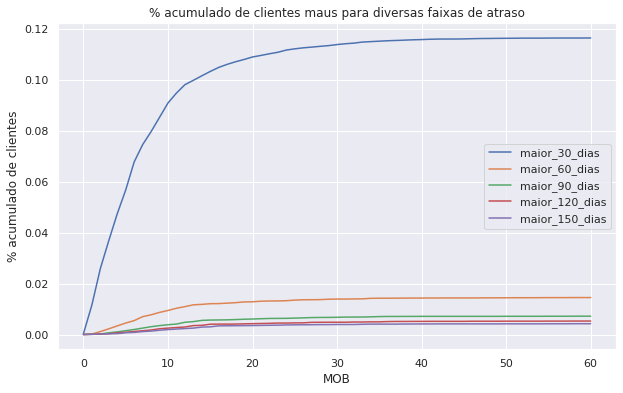

In [ ]:
df_taxa_mau.plot(grid = True, title = '% acumulado de clientes maus para diversas faixas de atraso', figsize=(10, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()

Podemos ver que, se considerarmos os atrasos entre 30 e 59 dias como critério para definir um mau pagador, teremos um impacto mais significativo em nossa base de dados, ultrapassando os 10%.

Vamos eliminar essa faixa do gráfico para que a escala nos permita olhar as curvas para os demais períodos de atraso.

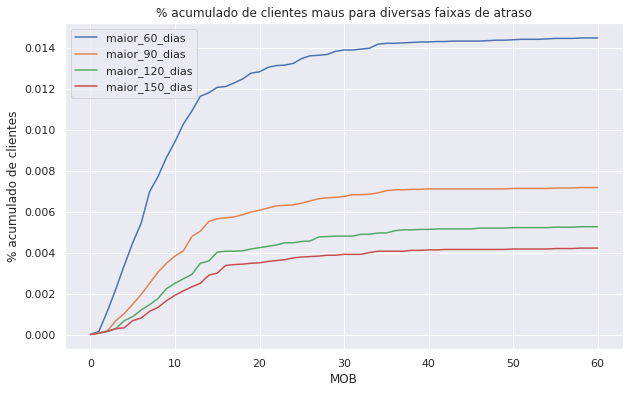

In [ ]:
df_taxa_mau.drop('maior_30_dias', axis=1).plot(grid = True, title = '% acumulado de clientes maus para diversas faixas de atraso', figsize=(10, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()

Agora podemos ver que temos uma inadimplência relativamente baixa (inferior a 1,5%) se considerarmos os atrasos superiores a 60 dias.

### **Vídeo 4 - Definindo o** ***Target***

Como vimos, há uma tendência a estabilizar a situação dos clientes maus pagadores a partir do 12º mês. Vamos verificar se iremos perder muita informação se desprezarmos os clientes que não tiverem pelo menos 12 meses de informação.

In [ ]:
meses_corte = 12
print('Total de Clientes            :',len(dados_aprovados.groupby('ID_Cliente').count().index))
print(f'Clientes com {meses_corte} meses ou mais:',
      len(dados_aprovados.query('Janela >= @meses_corte').groupby('ID_Cliente').count().index),'(',
      len(dados_aprovados.query('Janela >= @meses_corte').groupby('ID_Cliente').count().index) / len(dados_aprovados.groupby('ID_Cliente').count().index) *100,
      '%)')

Total de Clientes            : 45985
Clientes com 12 meses ou mais: 30918 ( 67.23496792432316 %)


Vamos permanecer com 67% dos nossos dados.

Pode ser suficiente, vamos começar separando esses clientes em um novo *dataset*, para poder retornar caso seja necessário.

In [ ]:
dados_aprov_tratamento1 = dados_aprovados.query('Janela >= @meses_corte').copy()
dados_aprov_tratamento1.shape

(943061, 14)

Agora podemos criar nossa variável *target*, ou seja, vamos criar um *dataframe* com todos os nossos clientes e a informação de quais são classificados como **maus pagadores**.

In [ ]:
def verifica(registros):
  lista_status = registros['Faixa_atraso'].to_list()
  if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
    return 1
  else:
    return 0

In [ ]:
# Fiz uma função alternativa que achei que seria mais rápida por não
# fazer a conferência de diversos strings
# Mas essa função se mostrou bem mais lenta... não entendi
# Mas deu o mesmo resultado

def verifica_2(registros):
    pior_status = registros['Ind_Faixa_atraso'].max()
    if pior_status >= 4:
        return 1
    else:
        return 0

In [ ]:
dados_creditos_id = pd.DataFrame(dados_aprov_tratamento1.groupby('ID_Cliente').apply(verifica)).reset_index()
dados_creditos_id.columns = ['ID_Cliente', 'Mau']
dados_creditos_id.head()

,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


In [ ]:
print(dados_creditos_id.Mau.sum(),'Maus Pagadores')

585 Maus Pagadores


Dentro de nossa base, temos então 585 clientes considerados mau pagadores.

Vamos ver como isso se comporta em relação aos totais de clientes cadastrados e clientes com empréstimos que temos em nossas bases tratadas.

In [ ]:
print(dados_creditos_id.shape[0],'Clientes com Crédito')

30918 Clientes com Crédito


In [ ]:
print(dados_cad_tratamento1.shape[0],'Clientes Cadastrados')

425822 Clientes Cadastrados


In [ ]:
print('Os',dados_creditos_id.Mau.sum(),'Maus Pagadores representam:')
print('- ',dados_creditos_id.Mau.sum() / dados_creditos_id.shape[0] * 100,'% dos Clientes com Crédito')
print('- ',dados_creditos_id.Mau.sum() / dados_cad_tratamento1.shape[0] * 100,'% dos Clientes Cadastrados')

Os 585 Maus Pagadores representam:
-  1.892101688336891 % dos Clientes com Crédito
-  0.1373813471356576 % dos Clientes Cadastrados


Como podemos ver, temos percentuais bem baixos de inadimplência em nossa base.

Esse desbalanceamento dos dados poderá nos dificultar futuramente no treinamento de modelos de *machine learning*.

Agora podemos juntar as informações que temos dos nossos clientes com crédito dentro da base de clientes cadastrados.

In [ ]:
df_registro_clientes_targets = dados_cad_tratamento1.merge(dados_creditos_id, on='ID_Cliente')
df_registro_clientes_targets.head()

,ID_Cliente,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado,Mau
0,5008806,1,1,0,"112,500.000000",Empregado,Ensino medio,Casado,Casa propria,59.000000,0,0,0,Seguranca,2.000000,3.100000,0
1,5008810,0,1,0,"270,000.000000",Associado comercial,Ensino medio,Solteiro,Casa propria,52.000000,0,1,1,Venda,1.000000,8.400000,0
2,5008811,0,1,0,"270,000.000000",Associado comercial,Ensino medio,Solteiro,Casa propria,52.000000,0,1,1,Venda,1.000000,8.400000,0
3,5008812,0,1,0,"283,500.000000",Pensionista,Ensino superior,Separado,Casa propria,62.000000,0,0,0,Outros,1.000000,-1.000000,0
4,5008813,0,1,0,"283,500.000000",Pensionista,Ensino superior,Separado,Casa propria,62.000000,0,0,0,Outros,1.000000,-1.000000,0


In [ ]:
print(df_registro_clientes_targets.shape)
print(df_registro_clientes_targets['Mau'].value_counts())

(22742, 17)
0    22225
1      517
Name: Mau, dtype: int64


In [ ]:
df_registro_clientes_targets['Mau'].value_counts(normalize=True)*100

0   97.726673
1    2.273327
Name: Mau, dtype: float64

Alguns pontos que chamam a atenção nessa consolidação das bases:
* Apesar de termos 425 mil clientes cadastrados e quase 31 mil clientes com informações de crédito, só conseguimos consolidar as informações de menos de 23 mil clientes
* Nossa base é muito desbalanceada, com pouco mais de 2% dos clientes em situação de mau pagador

É estranho termos 8 mil clientes com informações de crédito mas que não estão em nossa base cadastral. Possivelmente foram eliminados no tratamento da base, quando eliminamos aqueles registros duplicados e os *outliers* de rendimento anual. Vamos verificar isso:

In [ ]:
print('Clientes Desprezados (outliers):',df_renda_outliers.shape[0])
print('Info de Crédito de Outliers    :  ',df_renda_outliers.merge(dados_creditos_id, on='ID_Cliente').shape[0])

Clientes Desprezados (outliers): 12641
Info de Crédito de Outliers    :   677


Conseguimos encontrar apenas 677 clientes dos 8 mil que perdemos na consolidação (30918 - 22742 = 8176).

Isso é mais um indicativo de que podemos ter tido algum problema na geração inicial dos dados a serem utilizados para esse estudo (além dos registros duplicados que encontramos inicialmente).

#### **Desafio 6 - Criar Uma Tabela com a Quantidade Clientes Relativo a Base por Faixas Atraso**
---


A maneira mais simples de fazer isso é reaproveitando o código que usamos para calcular a taxa de maus pagadores mas não fazer a divisão pelo total de clientes.

Para saber os totais, pegaremos a última linha (60) do *dataframe* resultante.

In [ ]:
dict_qtd_mau = {} 

for chave in dict_intervalo_atraso.keys():
  df_min_mau = dados_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  df_mob_qtd_mau = pd.DataFrame({'MOB':range(0,61), 'Qtd_Mau': np.nan})
  lst = [] 
  for i in range(0,61): 
      due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
      lst.extend(due) 
      df_mob_qtd_mau.loc[df_mob_qtd_mau['MOB'] == i, 'Qtd_Mau'] = len(set(lst))
  dict_qtd_mau[chave] = df_mob_qtd_mau['Qtd_Mau']

df_qtd_mau = pd.DataFrame(dict_qtd_mau)
df_qtd_mau.loc[60]

maior_30_dias    5,350.000000
maior_60_dias      667.000000
maior_90_dias      331.000000
maior_120_dias     243.000000
maior_150_dias     195.000000
Name: 60, dtype: float64

#### **Desafio 7 - Pesquisar Técnicas para Resolver** ***Target***
---

Encontrar maneiras de resolver quando temos uma base de treino desbalanceada como é o caso dessa.

Pesquisei e encontrei diversos artigos a respeito. Destaco o que achei mais interessante:

* **Over Sampling:** aumentamos as amostras da classe que estiver com menor representação em nossa base, replicando dados de forma aleatória
 * **SMOTE (Synthetic Minority Over-sampling Technique):** gera novos dados (não duplicados) da classe minoritária a partir de vizinhos. Se forem geradas muitas amostras, pode levar ao *overfitting*
* **Under Sampling:** reduzimos de forma aleatória as amostras da classe que estiver com maior representação em nossa base
 * **Near Miss:** reduzimos a classe majoritária com base na distância entre os dados

&nbsp;

**REFERÊNCIAS:**
* [Como lidar com dados desbalanceados?](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/)
* [Lidando com Classes Desbalanceadas – Machine Learning](https://minerandodados.com.br/lidando-com-classes-desbalanceadas-machine-learning/)
* [Como lidar com dados desbalanceados em problemas de classificação](https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9)

#### **O que aprendemos nessa aula?**
---

>* Análise *Vintage*
>* Como definir a variável resposta a partir de alguns critérios
---


## **Aula 04 -** ***Machine Learning***
---


### **Vídeo 1 - Primeiros Modelos**

Chegou a hora de começar a trabalhar com *machine learning*.

E para isso, precisamos resolver o problema do balanceamento de nossa base de dados.

Mas antes, vamos organizar a distribuição das colunas de nosso *dataframe*, agrupando aquelas que tem características semelhantes.

In [ ]:
cols_categ_binarias = ['Tem_Carro',
                       'Tem_Casa_Propria',
                       'Tem_telefone_trabalho',
                       'Tem_telefone_fixo',
                       'Tem_email']
cols_categ_binarias

['Tem_Carro',
 'Tem_Casa_Propria',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email']

In [ ]:
cols_categ_nao_binarias = ['Categoria_de_renda',
                           'Grau_Escolaridade',
                           'Estado_Civil',
                           'Moradia',
                           'Ocupacao']
cols_categ_nao_binarias

['Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Ocupacao']

In [ ]:
cols_quantitativas = ['Idade',
                      'Qtd_Filhos',
                      'Rendimento_Anual',
                      'Anos_empregado',
                      'Tamanho_Familia']
cols_quantitativas

['Idade',
 'Qtd_Filhos',
 'Rendimento_Anual',
 'Anos_empregado',
 'Tamanho_Familia']

In [ ]:
df_registro_clientes_targets = df_registro_clientes_targets[['ID_Cliente'] + cols_quantitativas + cols_categ_binarias + cols_categ_nao_binarias + ['Mau']]
df_registro_clientes_targets.head()

,ID_Cliente,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia,Tem_Carro,Tem_Casa_Propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Ocupacao,Mau
0,5008806,59.000000,0,"112,500.000000",3.100000,2.000000,1,1,0,0,0,Empregado,Ensino medio,Casado,Casa propria,Seguranca,0
1,5008810,52.000000,0,"270,000.000000",8.400000,1.000000,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
2,5008811,52.000000,0,"270,000.000000",8.400000,1.000000,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
3,5008812,62.000000,0,"283,500.000000",-1.000000,1.000000,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0
4,5008813,62.000000,0,"283,500.000000",-1.000000,1.000000,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0


Com o *dataframe* organizado, vamos importar as bibliotecas que serão utilizadas nos modelos iniciais.

Também é necessário fixar algumas versões de bibliotecas e pacotes para garantir a reprodutibilidade dos nossos modelos.

In [ ]:
!pip install scikit-learn==0.23.2 imbalanced-learn==0.7.0

     |████████████████████████████████| 6.8 MB 15.8 MB/s 
     |████████████████████████████████| 167 kB 56.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, plot_confusion_matrix

from scipy import stats
from sklearn.pipeline import Pipeline, make_pipeline

Vamos também deixar pronta a função **`roda_modelo`** que usamos em outros módulos do *Bootcamp*, apenas com algumas alterações:
* ela vai calcular a métrica ***KS***
* vai imprimir a matriz de confusão
* vai imprimir o ***AUC Score*** e o ***Classification Report***
* vai retornar os dados da matriz de confusão para um *DataFrame* que iremos usar posteriormente para comparar os modelos

O ***KS*** é um indicador muito usado em análise de modelos de *Credit Score* e calcula a maior distância entre a probabilidade de o nosso modelo classificar um cliente como **ZERO** ou como **UM**. Como é interessante que o modelo consiga fazer uma clara distinção entre clientes das duas classes, quanto maior o resultado, melhor.

>Segundo a literatura: “O teste de *Kolmogorov-Smirnov* (KS) é utilizado no mercado financeiro como um dos indicadores de eficiência de modelos de *credit scoring*, sendo que o mercado considera um **bom modelo** aquele que apresente um valor de **KS igual ou superior a 30**”.



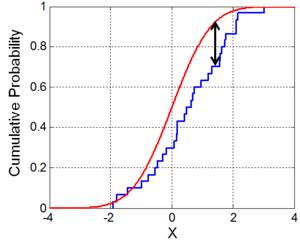

In [ ]:
SEED = 1561651
def roda_modelo(modelo, dados,df_result, otimizado=False):

    # separando dados em x e y, e tambem removendo a coluna de ID_cliente
    x = dados.drop(['ID_Cliente', 'Mau'], axis=1)
    #y = dados.drop('ID_Cliente', axis=1)['Mau']
    y = dados['Mau']
    
    # Separando dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=SEED)

    # Treinando modelo com os dados de treino
    modelo.fit(x_train, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(x_test)
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f'AUC {auc}')
    
    # Separando a probabilidade de ser bom e mau, e calculando o KS
    data_bom = np.sort(modelo.predict_proba(x_test)[:, 1])
    data_mau = np.sort(modelo.predict_proba(x_test)[:, 0])
    kstest = stats.ks_2samp(data_bom, data_mau)
    print(f'KS {kstest}')

    # Criando matriz de confusão
    matriz_confusao = plot_confusion_matrix(modelo, x_test, y_test, values_format='.0f', display_labels=['Bons', 'Maus'])
    plt.grid(False)    
    plt.show(matriz_confusao)

    xxx = type(modelo['Modelo']).__name__
    try:
        xxx = xxx + '_' + type(modelo['sampling']).__name__
    except:
        pass

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(x_test)
    mc = confusion_matrix(y_test, predicao)
    dict_result = {'Modelo':xxx,'Otimizado':otimizado,'VN':mc[0,0],'FP':mc[0,1],'FN':mc[1,0],'VP':mc[1,1], 'AUC':auc}
    df_result = df_result.append(pd.DataFrame([dict_result], columns=dict_result.keys()))
    print(color.BOLD+color.BLUE+color.UNDERLINE+'\nClassification Report'+color.END)
    print(classification_report(y_test, predicao, zero_division=0))
    return df_result

Como a ideia desse módulo é terminar tendo um modelo em produção, vamos também implementar um *pipeline*.

Em função disso, vamos usar as próprias ferramentas de pré-processamento do **`sklearn`** para fazer o tratamento das nossas variáveis categóricas e o escalonamento das variáveis contínuas.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # Tratamento de Variáveis Categóricas
from sklearn.preprocessing import MinMaxScaler # Tratamento de Variáveis Contínuas
from sklearn.base import BaseEstimator, TransformerMixin # Uso de Tratamento Personalizado no Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Agora vamos à criação da classe que será utilizada em nosso *pipeline*.

O objetivo é que a partir da definição dessa classe possamos usar o *pipeline* para todos os nossos modelos, pois ela terá o tratamento das variáveis categóricas (usando o **`OneHotEncoder`**) e contínuas (usando o **`MinMaxScaler`**).

In [ ]:
class Transformador(BaseEstimator, TransformerMixin):
    def __init__( self, colunas_continuas, colunas_categoricas):
        self.colunas_continuas = colunas_continuas
        self.colunas_categoricas = colunas_categoricas
        self.enc = OneHotEncoder()
        self.scaler = MinMaxScaler()

    def fit(self, X, y = None ):
        self.enc.fit(X[self.colunas_categoricas])
        self.scaler.fit(X[self.colunas_continuas])
        return self 

    def transform(self, X, y = None):
      
      X_categoricas = pd.DataFrame(data=self.enc.transform(X[self.colunas_categoricas]).toarray(),
                                  columns= self.enc.get_feature_names(self.colunas_categoricas))
      
      X_continuas = pd.DataFrame(data=self.scaler.transform(X[self.colunas_continuas]),
                                  columns= self.colunas_continuas)
      
      X = pd.concat([X_continuas, X_categoricas], axis=1)

      return X

Podemos começar a rodar os nossos modelos.

O primeiro modelo a ser testado é o **`DummyClassifier`**, que serve de base de comparação para os demais modelos que iremos testar.

In [ ]:
df_result = pd.DataFrame()

AUC 0.5
KS Ks_2sampResult(statistic=1.0, pvalue=0.0)


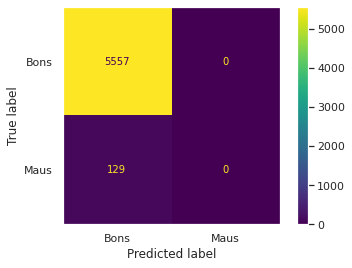


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('Modelo', DummyClassifier(strategy='prior'))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

O resultado, à primeira vista, pode parecer bom, pois tivemos um **f1-score** de 98%. Mas ao analisarmos melhor a matriz de confusão podemos ver que o modelo simplesmente classificou todos os clientes como bons pagadores, levando vantagem em razão do desbalanceamento de nossa base.

Vamos testar agora o modelo **`LogisticRegression`**.

AUC 0.5847293657137516
KS Ks_2sampResult(statistic=1.0, pvalue=0.0)


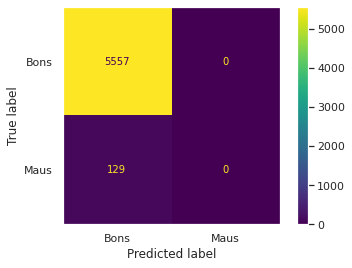


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

Os resultados foram os mesmos. O modelo fez a previsão de que todos os clientes seriam bons pagadores.

Realmente vai ser necessário resolver o problema do desbalanceamento da base para que os modelos possam ter melhores resultados.

### **Vídeo 2 - Tratando o Desbalanceamento dos Dados**

Conforme vimos anteriormente (Desafio 7), uma das técnicas para resolver o desbalanceamento de dados é o ***oversampling***. A técnica que iremos usar é a **SMOTE**. Conforme vimos anteriormente:

>>**SMOTE (Synthetic Minority Over-sampling Technique):** gera novos dados (não duplicados) da classe minoritária a partir de vizinhos. Se forem geradas muitas amostras, pode levar ao *overfitting*

É muito importante que essas técnicas sejam aplicadas somente nos dados de treino, nunca nos dados de teste.

Vamos importar as bibliotecas necessárias para fazer esse trabalho de dentro do **`imblearn`**. O próprio **SMOTE** e um novo *pipeline*, compatível com essa etapa de *sampling*.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

Feitas as importações podemos montar o novo *pipeline* e rodar o nosso modelo novamente.

AUC 0.5816938758713432
KS Ks_2sampResult(statistic=0.1290889905029898, pvalue=1.09559025330554e-41)


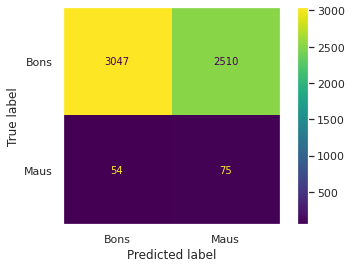


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.55      0.70      5557
           1       0.03      0.58      0.06       129

    accuracy                           0.55      5686
   macro avg       0.51      0.56      0.38      5686
weighted avg       0.96      0.55      0.69      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

Apesar de algumas métricas apontarem a queda de performance do modelo, nota-se que agora já conseguimos apontar alguns dos clientes como maus, o que é uma evolução em relação aos modelos anteriores. Mas esse modelo "desperdiçou" uma grande quantidade de clientes, rejeitando-os como maus pagadores, o que também é um problema.

Vamos testar outro tipo de modelo (o **`RandomForestClassifier`**) usando esses dados balanceados para verificar o resultado. Para efeitos de comparação, vamos primeiro rodar o modelo sem aplicar o *oversampling*.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

AUC 0.8225333506311616
KS Ks_2sampResult(statistic=0.9792472740063314, pvalue=0.0)


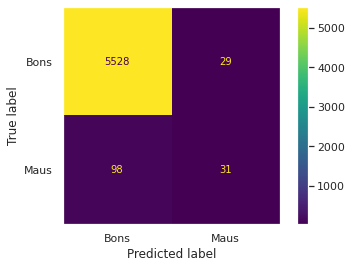


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.52      0.24      0.33       129

    accuracy                           0.98      5686
   macro avg       0.75      0.62      0.66      5686
weighted avg       0.97      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

Mesmo com os dados desbalanceados o **`RandomForestClassifier`** conseguiu obter uma performance melhor que o **`LogisticRegression`**, deixando de classificar tantos bons clientes como sendo maus pagadores.

Vamos aplicar o *oversampling* para tentar melhorar ainda mais o resultado.

AUC 0.8245721228759593
KS Ks_2sampResult(statistic=0.9646500175870559, pvalue=0.0)


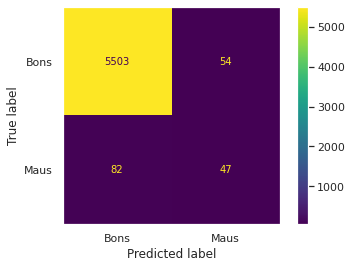


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5557
           1       0.47      0.36      0.41       129

    accuracy                           0.98      5686
   macro avg       0.73      0.68      0.70      5686
weighted avg       0.97      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

Tivemos uma melhora agora na classificação dos maus pagadores.

Para as aulas, esse é o melhor modelo atingido. Na próxima aula iremos tratar da implementação deste modelo em produção.

A ideia, no entanto, é buscar performances melhores com os desafios abaixo. E daí, implantar o que tiver a melhor performance.

#### **Desafio 8 - Explorar o** ***Undersampling***
---

Existem várias maneiras de se tratar o *undersampling*, podemos encontrá-las detalhadamente na [documentação](https://imbalanced-learn.org/stable/under_sampling.html).

Vamos aplicá-las ao nosso modelo utilizando o **`RandomForestClassifier`** para ver se alguma delas obtém um resultado interessante.


In [ ]:
from imblearn.under_sampling import ClusterCentroids

AUC 0.6197742075432481
KS Ks_2sampResult(statistic=0.9628913119943722, pvalue=0.0)


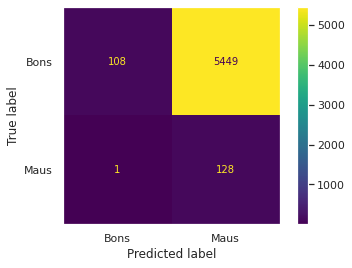


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.02      0.04      5557
           1       0.02      0.99      0.04       129

    accuracy                           0.04      5686
   macro avg       0.51      0.51      0.04      5686
weighted avg       0.97      0.04      0.04      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', ClusterCentroids(random_state=SEED)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

AUC 0.75466029994992
KS Ks_2sampResult(statistic=0.259760816039395, pvalue=5.828065973437109e-169)


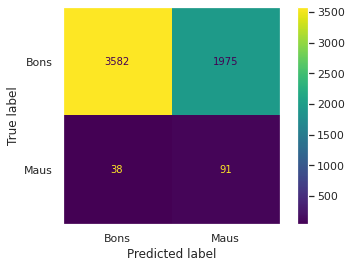


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.64      0.78      5557
           1       0.04      0.71      0.08       129

    accuracy                           0.65      5686
   macro avg       0.52      0.68      0.43      5686
weighted avg       0.97      0.65      0.76      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', RandomUnderSampler(random_state=SEED)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

In [ ]:
from imblearn.under_sampling import NearMiss

AUC 0.5212860935226609
KS Ks_2sampResult(statistic=0.8849806542384805, pvalue=0.0)


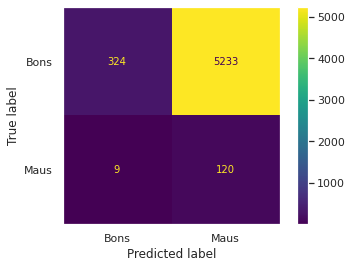


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.06      0.11      5557
           1       0.02      0.93      0.04       129

    accuracy                           0.08      5686
   macro avg       0.50      0.49      0.08      5686
weighted avg       0.95      0.08      0.11      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', NearMiss(version=1)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

AUC 0.6027442167362067
KS Ks_2sampResult(statistic=0.8301090397467464, pvalue=0.0)


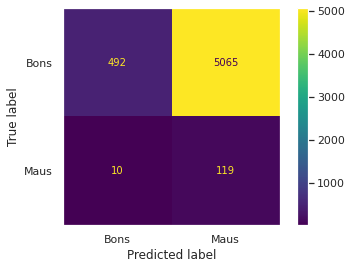


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.09      0.16      5557
           1       0.02      0.92      0.04       129

    accuracy                           0.11      5686
   macro avg       0.50      0.51      0.10      5686
weighted avg       0.96      0.11      0.16      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', NearMiss(version=2)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

AUC 0.6516405734509028
KS Ks_2sampResult(statistic=0.18360886387618713, pvalue=3.8495618460923637e-84)


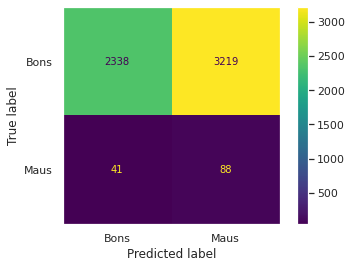


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.42      0.59      5557
           1       0.03      0.68      0.05       129

    accuracy                           0.43      5686
   macro avg       0.50      0.55      0.32      5686
weighted avg       0.96      0.43      0.58      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', NearMiss(version=3)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

In [ ]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

AUC 0.8218588748320786
KS Ks_2sampResult(statistic=0.96095673584242, pvalue=0.0)


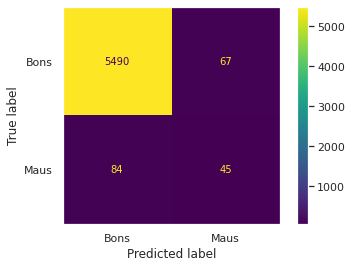


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.40      0.35      0.37       129

    accuracy                           0.97      5686
   macro avg       0.69      0.67      0.68      5686
weighted avg       0.97      0.97      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', NeighbourhoodCleaningRule()),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

In [ ]:
df_result['Acertos'] = df_result['VP']+df_result['VN']
df_result['Erros'] = df_result['FP']+df_result['FN']

df_result.sort_values(by=['VP','Erros'], ascending=False, inplace=True)
df_result.reset_index(drop=True, inplace=True)
df_result.head(10)

,Modelo,Otimizado,VN,FP,FN,VP,AUC,Acertos,Erros
0,RandomForestClassifier_ClusterCentroids,False,108,5449,1,128,0.619774,236,5450
1,RandomForestClassifier_NearMiss,False,324,5233,9,120,0.521286,444,5242
2,RandomForestClassifier_NearMiss,False,492,5065,10,119,0.602744,611,5075
3,RandomForestClassifier_RandomUnderSampler,False,3582,1975,38,91,0.754660,3673,2013
4,RandomForestClassifier_NearMiss,False,2338,3219,41,88,0.651641,2426,3260
5,LogisticRegression_SMOTE,False,3047,2510,54,75,0.581694,3122,2564
6,RandomForestClassifier_SMOTE,False,5503,54,82,47,0.824572,5550,136
7,RandomForestClassifier_NeighbourhoodCleaningRule,False,5490,67,84,45,0.821859,5535,151
8,RandomForestClassifier,False,5528,29,98,31,0.822533,5559,127
9,DummyClassifier,False,5557,0,129,0,0.500000,5557,129


Com esses resultados podemos verificar que o ***undersampling*** melhora nossos acertos de maus pagadores (*Verdadeiros Positivos*) mas também aumenta bastante nossos *Falsos Positivos*, reduzindo os clientes que receberiam aprovação de crédito e o faturamento do banco.

O único modelo de ***undersampling*** que pode ter um resultado interessante foi o **`NeighbourhoodCleaningRule`**, mas que ainda se saiu pior que o ***oversampling*** do **`SMOTE`**.

#### **Desafio 9 - Buscar Outros Modelos**
---

Em busca de melhorar ainda mais nossos resultados preditivos, vamos usar o **`LazyClassifier`**. Essa biblioteca nos permite rodar diversos modelos com seus parâmetros *default* em nosso *dataset* e ver quais apresentam a melhor performance.

A partir dos resultados, podemos testar a sintonia fina dos modelos que se mostrarem mais promissores.


In [ ]:
!pip install lazypredict

     |████████████████████████████████| 302 kB 14.5 MB/s 
     |████████████████████████████████| 127.6 MB 22 kB/s 
     |████████████████████████████████| 1.2 MB 52.4 MB/s 
     |████████████████████████████████| 10.1 MB 30.4 MB/s 
     |████████████████████████████████| 248 kB 62.1 MB/s 
     |████████████████████████████████| 14.5 MB 7.7 kB/s 
     |████████████████████████████████| 72 kB 1.0 MB/s 
     |████████████████████████████████| 25.9 MB 968 bytes/s 
     |████████████████████████████████| 6.8 MB 19.4 MB/s 
     |████████████████████████████████| 269 kB 61.8 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44635 sha256=308caa46a7298ec89258ab5966cd819216957f0d9487568b1e5fb2a94c3a355f
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfull

In [ ]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
mod_lazy = LazyClassifier(predictions=True)

x = df_registro_clientes_targets.drop(['ID_Cliente', 'Mau'], axis=1)
y = df_registro_clientes_targets['Mau']

# Separando dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=SEED)

# Treinando modelo com os dados de treino
lista_modelos, lista_prev = mod_lazy.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [01:04<00:00,  2.22s/it]


In [ ]:
lista_modelos

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.97,0.64,0.64,0.97,0.19
BaggingClassifier,0.98,0.63,0.63,0.97,0.71
ExtraTreeClassifier,0.97,0.62,0.62,0.97,0.11
LabelPropagation,0.98,0.62,0.62,0.97,14.37
LabelSpreading,0.98,0.62,0.62,0.97,23.37
RandomForestClassifier,0.98,0.60,0.60,0.97,1.65
ExtraTreesClassifier,0.98,0.60,0.60,0.97,1.46
XGBClassifier,0.98,0.57,0.57,0.97,2.44
LGBMClassifier,0.98,0.54,0.54,0.97,0.43


Tendo o *ranking* testado pelo **`LazyClassifier`**, vamos testar os melhores modelos indicados, já aplicando também as técnicas de *oversampling* e *undersampling*, para selecionar os modelos que iremos otimizar parâmetros.

##### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

AUC 0.7578931803312534
KS Ks_2sampResult(statistic=0.9569117129792473, pvalue=0.0)


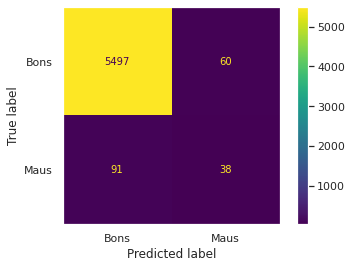


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.39      0.29      0.33       129

    accuracy                           0.97      5686
   macro avg       0.69      0.64      0.66      5686
weighted avg       0.97      0.97      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('Modelo', DecisionTreeClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

AUC 0.7581345129336141
KS Ks_2sampResult(statistic=0.9463594794231446, pvalue=0.0)


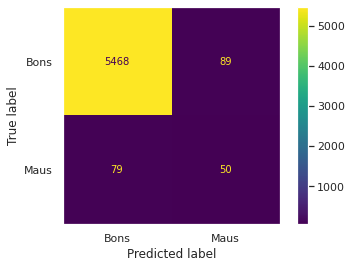


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5557
           1       0.36      0.39      0.37       129

    accuracy                           0.97      5686
   macro avg       0.67      0.69      0.68      5686
weighted avg       0.97      0.97      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', DecisionTreeClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

AUC 0.751610162753033
KS Ks_2sampResult(statistic=0.9224410833626451, pvalue=0.0)


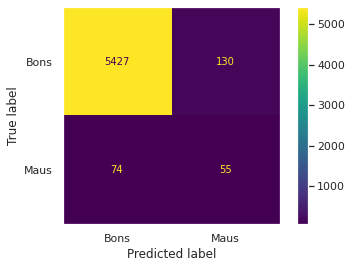


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5557
           1       0.30      0.43      0.35       129

    accuracy                           0.96      5686
   macro avg       0.64      0.70      0.67      5686
weighted avg       0.97      0.96      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', NeighbourhoodCleaningRule()),
                     ('Modelo', DecisionTreeClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

##### BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

AUC 0.7716540211173002
KS Ks_2sampResult(statistic=0.9792472740063314, pvalue=0.0)


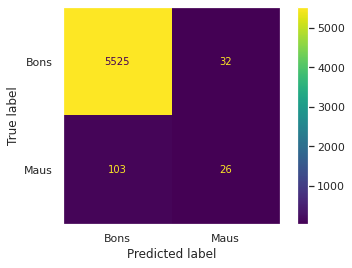


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.45      0.20      0.28       129

    accuracy                           0.98      5686
   macro avg       0.71      0.60      0.63      5686
weighted avg       0.97      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('Modelo', BaggingClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

AUC 0.751074488074961
KS Ks_2sampResult(statistic=0.9567358424199789, pvalue=0.0)


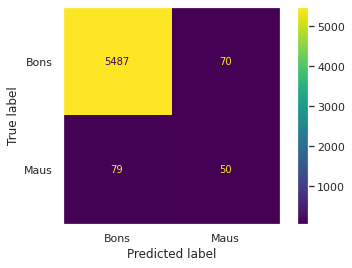


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5557
           1       0.42      0.39      0.40       129

    accuracy                           0.97      5686
   macro avg       0.70      0.69      0.69      5686
weighted avg       0.97      0.97      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', BaggingClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

AUC 0.7924239697678603
KS Ks_2sampResult(statistic=0.9569117129792473, pvalue=0.0)


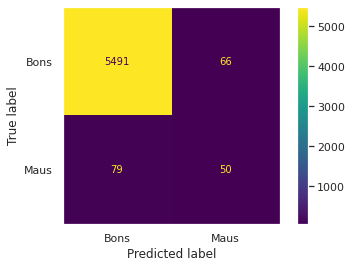


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5557
           1       0.43      0.39      0.41       129

    accuracy                           0.97      5686
   macro avg       0.71      0.69      0.70      5686
weighted avg       0.97      0.97      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', NeighbourhoodCleaningRule()),
                     ('Modelo', BaggingClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

##### ExtraTreeClassifier

In [ ]:
from sklearn.tree import ExtraTreeClassifier

AUC 0.7419603461239613
KS Ks_2sampResult(statistic=0.9676398170946183, pvalue=0.0)


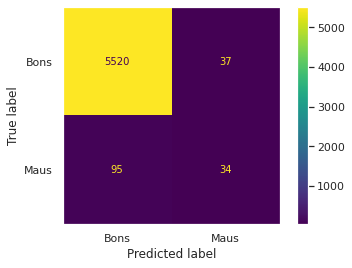


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.48      0.26      0.34       129

    accuracy                           0.98      5686
   macro avg       0.73      0.63      0.66      5686
weighted avg       0.97      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('Modelo', ExtraTreeClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

AUC 0.7347287379699883
KS Ks_2sampResult(statistic=0.9384453042560675, pvalue=0.0)


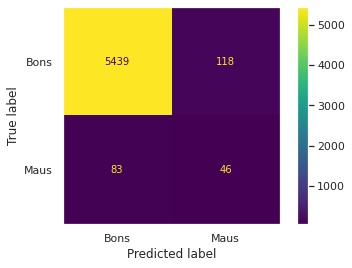


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5557
           1       0.28      0.36      0.31       129

    accuracy                           0.96      5686
   macro avg       0.63      0.67      0.65      5686
weighted avg       0.97      0.96      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', ExtraTreeClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

AUC 0.7342397953276334
KS Ks_2sampResult(statistic=0.9331691874780161, pvalue=0.0)


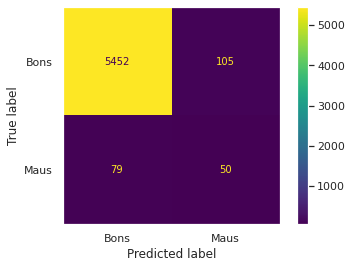


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5557
           1       0.32      0.39      0.35       129

    accuracy                           0.97      5686
   macro avg       0.65      0.68      0.67      5686
weighted avg       0.97      0.97      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', NeighbourhoodCleaningRule()),
                     ('Modelo', ExtraTreeClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

##### LabelPropagation

In [ ]:
from sklearn.semi_supervised import LabelPropagation

AUC 0.7584344349538887
KS Ks_2sampResult(statistic=0.9855786141399929, pvalue=0.0)


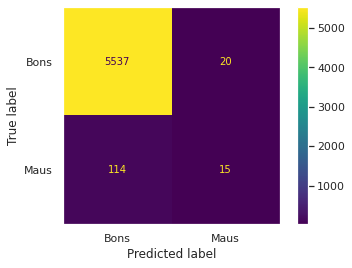


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.43      0.12      0.18       129

    accuracy                           0.98      5686
   macro avg       0.70      0.56      0.59      5686
weighted avg       0.97      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('Modelo', LabelPropagation())])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

AUC 0.749491876298209
KS Ks_2sampResult(statistic=0.7372493844530426, pvalue=0.0)


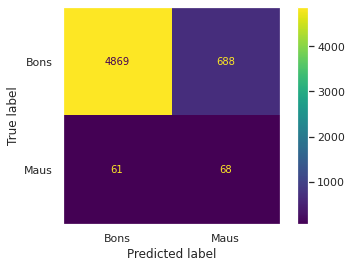


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      5557
           1       0.09      0.53      0.15       129

    accuracy                           0.87      5686
   macro avg       0.54      0.70      0.54      5686
weighted avg       0.97      0.87      0.91      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', LabelPropagation())])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

AUC 0.7581268405098396
KS Ks_2sampResult(statistic=0.9635947942314457, pvalue=0.0)


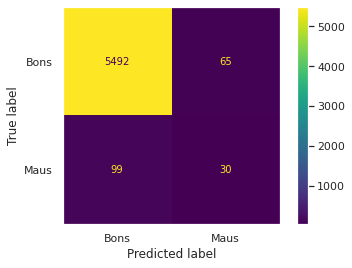


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.32      0.23      0.27       129

    accuracy                           0.97      5686
   macro avg       0.65      0.61      0.63      5686
weighted avg       0.97      0.97      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', NeighbourhoodCleaningRule()),
                     ('Modelo', LabelPropagation())])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

##### ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

AUC 0.8133934014365566
KS Ks_2sampResult(statistic=0.9737952866690116, pvalue=0.0)


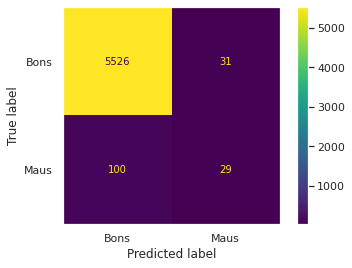


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.48      0.22      0.31       129

    accuracy                           0.98      5686
   macro avg       0.73      0.61      0.65      5686
weighted avg       0.97      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('Modelo', ExtraTreesClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

AUC 0.8305956730319886
KS Ks_2sampResult(statistic=0.9577910657755891, pvalue=0.0)


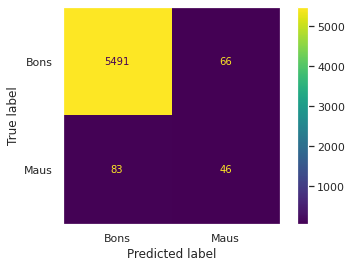


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5557
           1       0.41      0.36      0.38       129

    accuracy                           0.97      5686
   macro avg       0.70      0.67      0.68      5686
weighted avg       0.97      0.97      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', ExtraTreesClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

AUC 0.81573349068777
KS Ks_2sampResult(statistic=0.9468870911009497, pvalue=0.0)


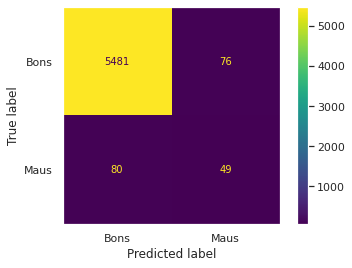


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5557
           1       0.39      0.38      0.39       129

    accuracy                           0.97      5686
   macro avg       0.69      0.68      0.69      5686
weighted avg       0.97      0.97      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', NeighbourhoodCleaningRule()),
                     ('Modelo', ExtraTreesClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

##### XGBClassifier

In [ ]:
from xgboost import XGBClassifier

AUC 0.7851163348692132
KS Ks_2sampResult(statistic=0.9885684136475554, pvalue=0.0)


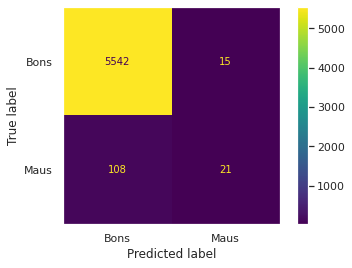


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.58      0.16      0.25       129

    accuracy                           0.98      5686
   macro avg       0.78      0.58      0.62      5686
weighted avg       0.97      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('Modelo', XGBClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

AUC 0.7590538088004095
KS Ks_2sampResult(statistic=0.9743228983468167, pvalue=0.0)


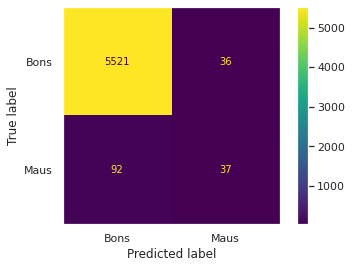


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.51      0.29      0.37       129

    accuracy                           0.98      5686
   macro avg       0.75      0.64      0.68      5686
weighted avg       0.97      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', XGBClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

AUC 0.772161796072556
KS Ks_2sampResult(statistic=0.9783679212099895, pvalue=0.0)


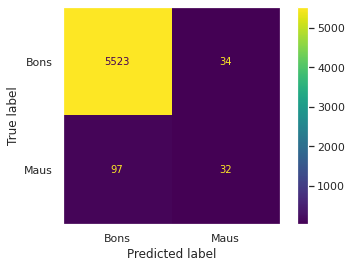


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.48      0.25      0.33       129

    accuracy                           0.98      5686
   macro avg       0.73      0.62      0.66      5686
weighted avg       0.97      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', NeighbourhoodCleaningRule()),
                     ('Modelo', XGBClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

##### LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

AUC 0.778164421436473
KS Ks_2sampResult(statistic=0.9929651776292648, pvalue=0.0)


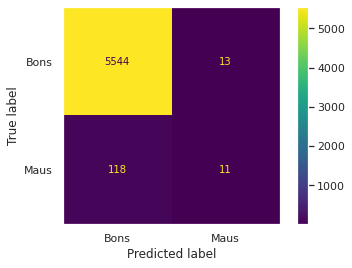


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.46      0.09      0.14       129

    accuracy                           0.98      5686
   macro avg       0.72      0.54      0.57      5686
weighted avg       0.97      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('Modelo', LGBMClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

AUC 0.7232410271003957
KS Ks_2sampResult(statistic=0.9664087231797397, pvalue=0.0)


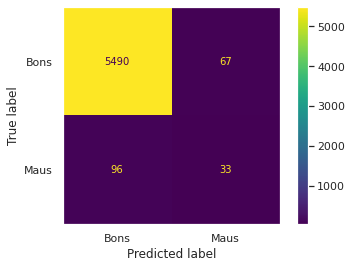


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.33      0.26      0.29       129

    accuracy                           0.97      5686
   macro avg       0.66      0.62      0.64      5686
weighted avg       0.97      0.97      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', LGBMClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

AUC 0.7897009568209941
KS Ks_2sampResult(statistic=0.9854027435807245, pvalue=0.0)


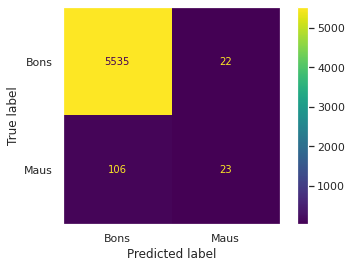


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.51      0.18      0.26       129

    accuracy                           0.98      5686
   macro avg       0.75      0.59      0.63      5686
weighted avg       0.97      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', NeighbourhoodCleaningRule()),
                     ('Modelo', LGBMClassifier(random_state=SEED))])   
df_result = roda_modelo(pipeline, df_registro_clientes_targets, df_result)

##### Resultados Comparados

Agora, aproveitando os resultados que foram armazenados em `df_result`, vamos comparar o desempenho dos modelos de acordo com os dados de suas matrizes de confusão.

In [ ]:
df_result['Acertos'] = df_result['VP']+df_result['VN']
df_result['Erros'] = df_result['FP']+df_result['FN']

df_result.sort_values(by=['VP','Erros'], ascending=False, inplace=True)
df_result.reset_index(drop=True, inplace=True)
df_result.query('Erros < 1000').head(15)

,Modelo,Otimizado,VN,FP,FN,VP,AUC,Acertos,Erros
6,LabelPropagation_SMOTE,False,4869,688,61,68,0.75,4937,749
7,DecisionTreeClassifier_NeighbourhoodCleaningRule,False,5427,130,74,55,0.75,5482,204
8,ExtraTreeClassifier_NeighbourhoodCleaningRule,False,5452,105,79,50,0.73,5502,184
9,DecisionTreeClassifier_SMOTE,False,5468,89,79,50,0.76,5518,168
10,BaggingClassifier_SMOTE,False,5487,70,79,50,0.75,5537,149
11,BaggingClassifier_NeighbourhoodCleaningRule,False,5491,66,79,50,0.79,5541,145
12,ExtraTreesClassifier_NeighbourhoodCleaningRule,False,5481,76,80,49,0.82,5530,156
13,RandomForestClassifier_SMOTE,False,5503,54,82,47,0.82,5550,136
14,ExtraTreeClassifier_SMOTE,False,5439,118,83,46,0.73,5485,201
15,ExtraTreesClassifier_SMOTE,False,5491,66,83,46,0.83,5537,149


Podemos ver que comparar os resultados pelos acertos de maus pagadores (**VP**) não é muito adequado. O melhor modelo nesse quesito nos apresentou uma grande quantidade de bons pagadores negados (**FP**).

Vamos procurar ordenar pelos erros de classificação de maus pagadores (**FN**), que seriam os empréstimos concedidos indevidamente.

In [ ]:
df_result.sort_values(by=['FN','Erros'], inplace=True)
df_result.reset_index(drop=True, inplace=True)
df_result.query('Erros < 1000').head(15)

,Modelo,Otimizado,VN,FP,FN,VP,AUC,Acertos,Erros
6,LabelPropagation_SMOTE,False,4869,688,61,68,0.75,4937,749
7,DecisionTreeClassifier_NeighbourhoodCleaningRule,False,5427,130,74,55,0.75,5482,204
8,BaggingClassifier_NeighbourhoodCleaningRule,False,5491,66,79,50,0.79,5541,145
9,BaggingClassifier_SMOTE,False,5487,70,79,50,0.75,5537,149
10,DecisionTreeClassifier_SMOTE,False,5468,89,79,50,0.76,5518,168
11,ExtraTreeClassifier_NeighbourhoodCleaningRule,False,5452,105,79,50,0.73,5502,184
12,ExtraTreesClassifier_NeighbourhoodCleaningRule,False,5481,76,80,49,0.82,5530,156
13,RandomForestClassifier_SMOTE,False,5503,54,82,47,0.82,5550,136
14,ExtraTreesClassifier_SMOTE,False,5491,66,83,46,0.83,5537,149
15,ExtraTreeClassifier_SMOTE,False,5439,118,83,46,0.73,5485,201


Com esses resultados podemos confirmar que o ajuste do desbalanceamento dos dados é necessário. Seja usando ***oversampling*** ou ***undersampling***, todos os modelos que passaram pelo **`SMOTE`** ou pelo **`NeighbourhoodCleaningRule`** apresentaram melhores resultados que os modelos com os dados originais.

Para recordar o conceito da nomenclatura:
* **Verdadeiro Negativo:** são os bons clientes que tiveram seus empréstimos concedidos. É um dos tipos de acerto do modelo
* **Falso Positivo:** representa um cliente perdido. É um bom pagador que teve seu empréstimo recusado. Pode ser considerado o erro mais leve desse modelo
* **Falso Negativo:** representa prejuízo para o banco. É um mau pagador que teve seu pedido de empréstimo aceito. É o erro mais grave do modelo
* **Verdadeiro Positivo:** são os outros acertos do modelo, os pedidos de empréstimos feitos por maus pagadores que foram devidamente negados

Alguns modelos, apesar de terem bons resultados para *Verdadeiro Positivo* e *Falso Negativo*, apresentaram muitos **alarmes falsos** (*Falso Positivo*) e por isso vão ficar de lado.

Outros modelos como, por exemplo o **`BaggingClassifier`**, piora um pouco os *Falsos Positivos* mas melhora os *Falsos Negativos* e os *Verdadeiros Positivos*, o que pode ser uma troca interessante. 

Para decidir quais modelos vamos priorizar para testar diferentes parâmetros, resolvi criar um *score* baseado na quantidade de erros encontrados e que deixa o modelo mais interessante quanto mais próximo de zero for o resultado. Esse *score* inclusive pode ser usado posteriormente quando formos buscar otimizar os parâmetros dos modelos.

Para isso, vamos atribuir o peso 5 para os *Falsos Negativos* e peso 1 para os *Falsos Positivos* e ordenar os resultados por esse *score*.

In [ ]:
peso_FN = 5
peso_FP = 1
df_result['Score'] = df_result['FP'] * peso_FP + df_result['FN'] * peso_FN

df_result.sort_values(by=['Score','Erros'], inplace=True)
df_result.reset_index(drop=True, inplace=True)
df_result.head(10)

,Modelo,Otimizado,VN,FP,FN,VP,AUC,Acertos,Erros,Score
0,BaggingClassifier_NeighbourhoodCleaningRule,False,5491,66,79,50,0.79,5541,145,461
1,RandomForestClassifier_SMOTE,False,5503,54,82,47,0.82,5550,136,464
2,BaggingClassifier_SMOTE,False,5487,70,79,50,0.75,5537,149,465
3,ExtraTreesClassifier_NeighbourhoodCleaningRule,False,5481,76,80,49,0.82,5530,156,476
4,ExtraTreesClassifier_SMOTE,False,5491,66,83,46,0.83,5537,149,481
5,DecisionTreeClassifier_SMOTE,False,5468,89,79,50,0.76,5518,168,484
6,RandomForestClassifier_NeighbourhoodCleaningRule,False,5490,67,84,45,0.82,5535,151,487
7,XGBClassifier_SMOTE,False,5521,36,92,37,0.76,5558,128,496
8,ExtraTreeClassifier_NeighbourhoodCleaningRule,False,5452,105,79,50,0.73,5502,184,500
9,DecisionTreeClassifier_NeighbourhoodCleaningRule,False,5427,130,74,55,0.75,5482,204,500


Com esse resultado podemos ver que os modelos que apresentaram os melhores resultados foram o **`BaggingClassifier`**, o **`RandomForestClassifier`** e o **`ExtraTreesClassifier`**, usando o **`NeighbourhoodCleaningRule`** e o **`SMOTE`**. Vamos agora tentar melhorar suas parametrizações.

#### **Desafio 10 - Otimizar Hiper Parâmetros e Revisar Seleção de Variáveis**
---



Os melhores modelos encontrados, rodando com suas configurações *default*, foram:

|     Modelo           | Falso Positivo | Falso Negativo | Verdadeiro Positivo | Score |
|----------------------|----------------|----------------|---------------------|-------|
| Bagging_NeighbourhoodCleaning       |  66  |**79**|**50**|**461**| 
| Random Forest_SMOTE                 |**54**|  82  |  47  |  464  |
| Bagging_SMOTE                       |  70  |**79**|**50**|  465  | 
| ExtraTrees_NeighbourhoodCleaning    |  76  |  80  |  49  |  476  | 
| ExtraTrees_SMOTE                    |  66  |  83  |  46  |  481  | 
| Random Forest_NeighbourhoodCleaning |  67  |  84  |  45  |  487  |


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

Vamos agora preparar as funções que irão rodar com variações randomizadas dos parâmetros de cada modelo para verificar se conseguimos melhorar os resultados.

Teremos 3 funções:
1. **`confusion_matrix_scorer`**: é uma função que irá basear a performance do modelo de acordo com os resultados obtidos na matriz de confusão, aplicando os pesos definidos anteriormente para os erros (*Falso Negativo* = 5 e *Falso Positivo* = 1)
1. **`roda_modelo_RandomizedSearchCV`**: é a função que roda o modelo randomizando os parâmetros de acordo com os *ranges* que foram passados nas variáveis de parâmetros
1. **`report`**: é uma função que mostra o *score* médio e o desvio padrão obtido pelo melhor conjunto de parâmetros, bem como os parâmetros que foram utilizados

In [ ]:
def confusion_matrix_scorer(clf, x, y):
     y_pred = clf.predict(x)
     bom_certo, fp, fn, mau_certo = confusion_matrix(y, y_pred).ravel()
     
     score = (fn*peso_FN + fp*peso_FP)*-1
     #print(f'{score};{bom_certo};{fp};{fn};{mau_certo};{peso_FP};{peso_FN}')

     return score

In [ ]:
def roda_modelo_RandomizedSearchCV(modelo, dados, n_splits, n_repeats, espaco_de_parametros, n_iter):

    np.random.seed(SEED)
    dados = dados.sample(frac=1).reset_index(drop=True)
    x_columns = dados.columns
    y = dados['Mau']
    x = dados[x_columns].drop(['Mau'], axis=1)

    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats=n_repeats, random_state=SEED)

    busca = RandomizedSearchCV(modelo, param_distributions=espaco_de_parametros,
                                n_iter = n_iter, cv = cv, scoring=confusion_matrix_scorer)#,
                                #return_train_score=True)
    busca.fit(x, y)

    resultados = pd.DataFrame(busca.cv_results_)

    return resultados, busca

In [ ]:
def report(res_modelo, busca_modelo, nome_modelo):
    print(f'\n{nome_modelo}')
    score_medio = res_modelo.iloc[busca_modelo.best_index_][['mean_test_score']][0]
    score_std = res_modelo.iloc[busca_modelo.best_index_][['std_test_score']][0]

    print(f'Score Médio {score_medio}')
    print(f'Intervalo {score_medio - 2 * score_std} a {score_medio + 2 * score_std}')
    print(f'Range     {4 * score_std}')
    with pd.option_context('max_colwidth', None):
        print(f'Parâmetros: {res_modelo.iloc[busca_modelo.best_index_][["params"]][0]}')

Para alimentar a função **`roda_modelo_RandomizedSearchCV`** precisamos criar as variáveis que irão estabelecer os possíveis valores para a lista de parâmetros que será testada.

In [ ]:
np.random.seed(SEED)
    
param_Bag = {'n_estimators':randint(10,50)}
params_Bag = {'Modelo__' + key: param_Bag[key] for key in param_Bag}

param_ETC = {
    'n_estimators' :randint(100, 900),
    'max_depth' : randint(5, 20),
    'min_samples_split' : randint(10, 20),
    'min_samples_leaf' : randint(1, 5),
    'bootstrap' : [True, False],
    'criterion' : ['gini', 'entropy']}
params_ETC = {'Modelo__' + key: param_ETC[key] for key in param_ETC}

param_RFC = {
    'n_estimators' :randint(100, 500),
    'max_depth' : randint(7, 20),
    'min_samples_split' : randint(2, 8),
    'min_samples_leaf' : randint(1, 12),
    'bootstrap' : [True, False],
    'criterion' : ['gini', 'entropy']}
params_RFC = {'Modelo__' + key: param_RFC[key] for key in param_RFC}

Vamos agora criar e executar os *pipelines* que irão fazer os testes randomizados de parâmetros usando o **`RandomizedSearchCV`** e comparar os resultados otimizados obtidos com os resultados que já tínhamos, usando os parâmetros *default*. Sem esquecer que o nosso *score* é melhor quanto mais próximo de **ZERO** for o resultado.

In [ ]:
#Executado em 2485seg - 0h41min25seg
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', NeighbourhoodCleaningRule()),
                     ('Modelo', BaggingClassifier(random_state=SEED))])   
res_Bag_ncr, busca_Bag_ncr = roda_modelo_RandomizedSearchCV(pipeline, df_registro_clientes_targets, 5, 5, params_Bag, 10)

In [ ]:
print(color.BOLD+color.BLUE+color.UNDERLINE+'Bagging Classifier com NCR'+color.END)
print('Score Obtido com Parâmetros Default:',-df_result['Score'].loc[0],'\n')

report(res_Bag_ncr, busca_Bag_ncr, 'Bagging Classifier')

Bagging Classifier com NCR
Score Obtido com Parâmetros Default: -461 


Bagging Classifier
Score Médio -384.96
Intervalo -414.70279072313156 a -355.2172092768684
Range     59.4855814462631
Parâmetros: {'Modelo__n_estimators': 31}


Para o modelo usando **`BaggingClassifier`** e o *undersampling* **`NeighbourhoodCleaningRule`** tivemos uma melhora no *score* obtido.

O modelo já tinha apresentado o melhor desempenho com *score* de 461 (5 x 79FN + 66FP), agora atingimos 384,96 (5 x 65,08FN + 59,56FP). A alteração de parâmetros conseguiu reduzir os dois tipos de erros e esse modelo passou a ser o melhor resultado com os parâmetros alterados (e a 3ª posição com os parâmetros *default*).

In [ ]:
#Executado em 3689seg - 1h01min29seg
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
res_RFC_sm, busca_RFC_sm = roda_modelo_RandomizedSearchCV(pipeline, df_registro_clientes_targets, 5, 5, params_RFC, 10)

In [ ]:
print(color.BOLD+color.BLUE+color.UNDERLINE+'Random Forest Classifier com SMOTE'+color.END)
print('Score Obtido com Parâmetros Default:',-df_result['Score'].loc[1],'\n')

report(res_RFC_sm, busca_RFC_sm, 'Random Forest Classifier')

Random Forest Classifier com SMOTE
Score Obtido com Parâmetros Default: -464 


Random Forest Classifier
Score Médio -511.88
Intervalo -574.8271397285055 a -448.93286027149446
Range     125.89427945701107
Parâmetros: {'Modelo__bootstrap': False, 'Modelo__criterion': 'gini', 'Modelo__max_depth': 19, 'Modelo__min_samples_leaf': 8, 'Modelo__min_samples_split': 7, 'Modelo__n_estimators': 431}


Para o modelo usando **`RandomForestClassifier`** e o *oversampling* **`SMOTE`** tivemos uma piora no *score* obtido.

A alteração de parâmetros reduziu bastante os *Falsos Negativos* (de 82 para 75,20), mas piorou muito os *Falsos Positivos* (de 54 para 135,88). Apesar de ter piorado o erro menos grave, isso foi o suficiente para levar o score de 464 para 511,88.

Com isso, o modelo com parâmetros *default* ficou na 4ª colocação e com os parâmetros otimizados ficou em 10º lugar.

In [ ]:
#Executado em 1611seg - 0h26min51seg
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', BaggingClassifier(random_state=SEED))])   
res_Bag_sm, busca_Bag_sm = roda_modelo_RandomizedSearchCV(pipeline, df_registro_clientes_targets, 5, 5, params_Bag, 10)

In [ ]:
print(color.BOLD+color.BLUE+color.UNDERLINE+'Bagging Classifier com SMOTE'+color.END)
print('Score Obtido com Parâmetros Default:',-df_result['Score'].loc[2],'\n')

report(res_Bag_sm, busca_Bag_sm, 'Bagging Classifier')

Bagging Classifier com SMOTE
Score Obtido com Parâmetros Default: -465 


Bagging Classifier
Score Médio -400.16
Intervalo -427.32279808856225 a -372.9972019114378
Range     54.32559617712446
Parâmetros: {'Modelo__n_estimators': 33}


Para o modelo usando **`BaggingClassifier`** e o *oversampling* **`SMOTE`** novamente tivemos uma melhora no *score* obtido.

Se antes tínhamos 465 (5 x 79FN + 70FP), agora atingimos 400,16 (5 x 68,48FN + 57,76FP). A otimização de parâmetros reduziu os dois tipos de erros e esse passou a ser o 2º melhor resultado, permanecendo em 5º lugar com os parâmetros *default*.

In [ ]:
#Executado em 3692seg - 1h01min32seg
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', NeighbourhoodCleaningRule()),
                     ('Modelo', ExtraTreesClassifier(random_state=SEED))])   
res_ETC_ncr, busca_ETC_ncr = roda_modelo_RandomizedSearchCV(pipeline, df_registro_clientes_targets, 5, 5, params_ETC, 10)

In [ ]:
print(color.BOLD+color.BLUE+color.UNDERLINE+'Extra Trees Classifier com NCR'+color.END)
print('Score Obtido com Parâmetros Default:',-df_result['Score'].loc[3],'\n')

report(res_ETC_ncr, busca_ETC_ncr, 'Extra Trees Classifier')

Extra Trees Classifier com NCR
Score Obtido com Parâmetros Default: -476 


Extra Trees Classifier
Score Médio -513.44
Intervalo -523.8258365094007 a -503.05416349059936
Range     20.77167301880135
Parâmetros: {'Modelo__bootstrap': False, 'Modelo__criterion': 'entropy', 'Modelo__max_depth': 19, 'Modelo__min_samples_leaf': 4, 'Modelo__min_samples_split': 12, 'Modelo__n_estimators': 401}


In [ ]:
#Executado em 3084seg - 0h51min24seg
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', ExtraTreesClassifier(random_state=SEED))])   
res_ETC_sm, busca_ETC_sm = roda_modelo_RandomizedSearchCV(pipeline, df_registro_clientes_targets, 5, 5, params_ETC, 10)

In [ ]:
print(color.BOLD+color.BLUE+color.UNDERLINE+'Extra Trees Classifier com SMOTE'+color.END)
print('Score Obtido com Parâmetros Default:',-df_result['Score'].loc[4],'\n')

report(res_ETC_sm, busca_ETC_sm, 'Extra Trees Classifier')

Extra Trees Classifier com SMOTE
Score Obtido com Parâmetros Default: -481 


Extra Trees Classifier
Score Médio -632.48
Intervalo -726.7597878656926 a -538.2002121343074
Range     188.55957573138522
Parâmetros: {'Modelo__bootstrap': False, 'Modelo__criterion': 'entropy', 'Modelo__max_depth': 19, 'Modelo__min_samples_leaf': 4, 'Modelo__min_samples_split': 12, 'Modelo__n_estimators': 401}


O modelo **`ExtraTreesClassifier`** apresentou queda de performance para *undersampling* (com o **`NeighbourhoodCleaningRule`**) e para *oversampling* (com o **`SMOTE`**).

No caso do *undersampling* tivemos uma queda significativa dos *Falsos Positivos* (de 76 para 1,44), mas esse é o erro menos grave. Os *Falsos Negativos* subiram de 80 para 102,40, fazendo com que o *score* fosse de 476 (6ª posição) para 513,44 (11ª posição).

Já o *oversampling* teve o efeito contrário. Um aumento muito grande dos *Falsos Positivos* (de 66 para 320,48) que não foi compensado pela queda dos *Falsos Negativos* (de 83 para 62,40), mesmo com o peso 5 atribuído a este. Com isso, o *score* foi de 481 (7ª posição) para 632,48 (12ª e última posição).

In [ ]:
#Executado em 3540seg - 0h59min00seg
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', NeighbourhoodCleaningRule()),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
res_RFC_ncr, busca_RFC_ncr = roda_modelo_RandomizedSearchCV(pipeline, df_registro_clientes_targets, 5, 5, params_RFC, 10)

In [ ]:
print(color.BOLD+color.BLUE+color.UNDERLINE+'Random Forest Classifier com NCR'+color.END)
print('Score Obtido com Parâmetros Default:',-df_result['Score'].loc[6],'\n')

report(res_RFC_ncr, busca_RFC_ncr, 'Random Forest Classifier')

Random Forest Classifier com NCR
Score Obtido com Parâmetros Default: -487 


Random Forest Classifier
Score Médio -498.64
Intervalo -516.8817543016016 a -480.3982456983984
Range     36.48350860320318
Parâmetros: {'Modelo__bootstrap': False, 'Modelo__criterion': 'entropy', 'Modelo__max_depth': 13, 'Modelo__min_samples_leaf': 1, 'Modelo__min_samples_split': 5, 'Modelo__n_estimators': 428}


O modelo **`RandomForestClassifier`** usando o *undersampling* **`NeighbourhoodCleaningRule`** também apresentou uma ligeira queda de performance, com o *score* de 487 indo para 498,64.

A exemplo do que ocorreu com o **`ExtraTreesClassifier`** usando o **`NeighbourhoodCleaningRule`**, a alteração de parâmetros fez com que o modelo melhorasse bastante os *Falsos Positivos* (de 67 para 6,84), que é o erro menos grave. Mas como os *Falsos Negativos* (que tem peso 5) subiram de 84 para 98,36, o *score* piorou de 487 (8ª posição) para 498,64 (9ª posição).


###### Parâmetros Otimizados
---

Vamos verificar agora como ficaram os parâmetros dos modelos que tiveram a melhor performance:

|    Modelo    | Sampling | Otimizado? |  Score  |
|:------------:|:--------:|:----------:|:-------:|
|    Bagging   |    NCR   |     Sim    | -384,96 |
|    Bagging   |   SMOTE  |     Sim    | -400,16 |
|    Bagging   |    NCR   |     Não    |   -461  |
| RandomForest |   SMOTE  |     Não    |   -464  |

Como podemos ver, somente dois modelos tiveram ganho de performance com a otimização de parâmetros. Vamos obter esses parâmetros para aplicar em nosso modelo de produção.

In [ ]:
best_param_Bag_ncr = res_Bag_ncr.iloc[busca_Bag_ncr.best_index_][["params"]][0]
best_param_Bag_ncr['random_state'] = SEED
best_param_Bag_ncr

{'Modelo__n_estimators': 31, 'random_state': 1561651}

In [ ]:
best_param_Bag_sm = res_Bag_sm.iloc[busca_Bag_sm.best_index_][["params"]][0]
best_param_Bag_sm['random_state'] = SEED
best_param_Bag_sm

{'Modelo__n_estimators': 33, 'random_state': 1561651}

##### Default

In [ ]:
df_result_final = pd.DataFrame()

AUC 0.7924239697678603
KS Ks_2sampResult(statistic=0.9569117129792473, pvalue=0.0)


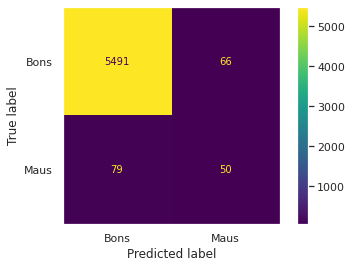


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5557
           1       0.43      0.39      0.41       129

    accuracy                           0.97      5686
   macro avg       0.71      0.69      0.70      5686
weighted avg       0.97      0.97      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', NeighbourhoodCleaningRule()),
                     ('Modelo', BaggingClassifier(random_state=SEED))])   
df_result_final = roda_modelo(pipeline, df_registro_clientes_targets, df_result_final)

AUC 0.751074488074961
KS Ks_2sampResult(statistic=0.9567358424199789, pvalue=0.0)


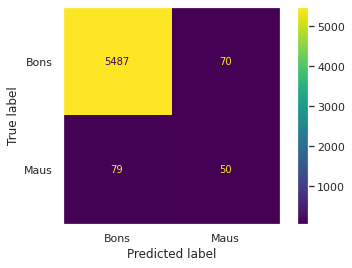


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5557
           1       0.42      0.39      0.40       129

    accuracy                           0.97      5686
   macro avg       0.70      0.69      0.69      5686
weighted avg       0.97      0.97      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', BaggingClassifier(random_state=SEED))])   
df_result_final = roda_modelo(pipeline, df_registro_clientes_targets, df_result_final)

##### Otimizados

AUC 0.7989211177186953
KS Ks_2sampResult(statistic=0.957263454097784, pvalue=0.0)


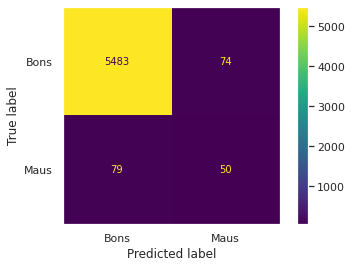


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5557
           1       0.40      0.39      0.40       129

    accuracy                           0.97      5686
   macro avg       0.69      0.69      0.69      5686
weighted avg       0.97      0.97      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', NeighbourhoodCleaningRule()),
                     ('Modelo', BaggingClassifier(n_estimators=31, random_state=SEED))])   
df_result_final = roda_modelo(pipeline, df_registro_clientes_targets, df_result_final, otimizado=True)

AUC 0.7860419081736422
KS Ks_2sampResult(statistic=0.9591980302497362, pvalue=0.0)


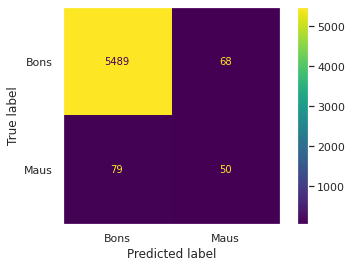


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5557
           1       0.42      0.39      0.40       129

    accuracy                           0.97      5686
   macro avg       0.70      0.69      0.70      5686
weighted avg       0.97      0.97      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', BaggingClassifier(n_estimators=33, random_state=SEED))])   
df_result_final = roda_modelo(pipeline, df_registro_clientes_targets, df_result_final, otimizado=True)

In [ ]:
df_result_final['Acertos'] = df_result_final['VP']+df_result_final['VN']
df_result_final['Erros'] = df_result_final['FP']+df_result_final['FN']
Peso_FP = 5
Peso_FN = 1
df_result_final['Score'] = (df_result_final['FP'] * Peso_FP + df_result_final['FN'] * Peso_FN) * -1

df_result_final

,Modelo,Otimizado,VN,FP,FN,VP,AUC,Acertos,Erros,Score
0,BaggingClassifier_NeighbourhoodCleaningRule,False,5491,66,79,50,0.79,5541,145,-409
0,BaggingClassifier_SMOTE,False,5487,70,79,50,0.75,5537,149,-429
0,BaggingClassifier_NeighbourhoodCleaningRule,True,5483,74,79,50,0.80,5533,153,-449
0,BaggingClassifier_SMOTE,True,5489,68,79,50,0.79,5539,147,-419


In [ ]:
df_result_final.reset_index(drop=True, inplace=True)
df_result_final.sort_values(by='Score', ascending=False)

,Modelo,Otimizado,VN,FP,FN,VP,AUC,Acertos,Erros,Score
0,BaggingClassifier_NeighbourhoodCleaningRule,False,5491,66,79,50,0.79,5541,145,-409
3,BaggingClassifier_SMOTE,True,5489,68,79,50,0.79,5539,147,-419
1,BaggingClassifier_SMOTE,False,5487,70,79,50,0.75,5537,149,-429
2,BaggingClassifier_NeighbourhoodCleaningRule,True,5483,74,79,50,0.80,5533,153,-449


Pelos critérios usados anteriormente para criar a coluna *score*, o melhor modelo continuou sendo o **`BaggingClassifier`**, agora com um pouco mais de vantagem em relação aos demais modelos quando usando os parâmetros otimizados.

Os demais modelos pioraram seus resultados quando utilizados os parâmetros otimizados.


##### **Separando Dados para Predição**
---

Vamos agora separar parte dos dados, treinar os 3 melhores modelos usando 95% dos dados e fazer um novo teste com os 5% restantes, que serão dados nunca vistos pelo modelo.

In [ ]:
dados_modelo = df_registro_clientes_targets.sample(frac=0.95, random_state=SEED)
dados_separados = df_registro_clientes_targets.drop(dados_modelo.index)
dados_modelo.reset_index(inplace=True, drop=True)
dados_separados.reset_index(inplace=True, drop=True)

In [ ]:
print('Dados para Preparação do Modelo     ',dados_modelo.shape)
print('Dados para Teste Posterior do Modelo ',dados_separados.shape)

Dados para Preparação do Modelo      (21605, 17)
Dados para Teste Posterior do Modelo  (1137, 17)


Já com os dois *datasets* separados, vamos fazer o processo de transformação das variáveis quantitativas e categóricas a partir dos dados que serão usados para o treino do modelo e depois aplicar o resultado nos dados que foram separados para o teste final.

In [ ]:
transf = Transformador(cols_quantitativas, cols_categoricas)
transf.fit(dados_modelo)
df_transf_mod_final = transf.transform(dados_modelo)
df_transformado_mod_final = df_transf_mod_final.merge(dados_modelo[['ID_Cliente','Mau']], left_index=True, right_index=True)

df_transf_sep_final = transf.transform(dados_separados)
df_transformado_sep_final = df_transf_mod_final.merge(dados_separados[['ID_Cliente','Mau']], left_index=True, right_index=True)

Com os dados preparados, vamos aplicar o *undersampling* e *oversampling* nos dados de treino para rodar os modelos.

Dessa vez não iremos usar funções para rodar os modelos, para preservar todas as informações em variáveis que possam ser resgatadas nos passos seguintes.

In [ ]:
x_columns = df_transformado_mod_final.columns
y = df_transformado_mod_final['Mau']
x = df_transformado_mod_final[x_columns].drop(['Mau'], axis=1)

# Separando dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=SEED)

# Fazendo o undersampling nos dados de treino
ncr = NeighbourhoodCleaningRule()
x_train_ncr, y_train_ncr = ncr.fit_resample(x_train, y_train)

# Fazendo o oversampling nos dados de treino
sm = SMOTE(random_state=SEED)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [ ]:
mod_Bag_ncr = BaggingClassifier(n_estimators=31, random_state=SEED)
mod_Bag_sm = BaggingClassifier(n_estimators=33, random_state=SEED)
mod_RFC = RandomForestClassifier(random_state=SEED)

Finalmente vamos treinar e calcular o desempenho dos modelos finalistas antes de passar para a implementação do modelo escolhido em produção.

AUC BaggingClassifier com NeighbourhoodCleaningRule 0.7646174863387978
AUC BaggingClassifier com SMOTE                     0.7523123137108794
AUC RandomForest com SMOTE                          0.7939013599105812

KS BaggingClassifier com NeighbourhoodCleaningRule Ks_2sampResult(statistic=0.9527952610144391, pvalue=0.0)
KS BaggingClassifier com SMOTE                     Ks_2sampResult(statistic=0.9655683080340615, pvalue=0.0)
KS RandomForest com SMOTE                          Ks_2sampResult(statistic=0.970381340244354, pvalue=0.0)



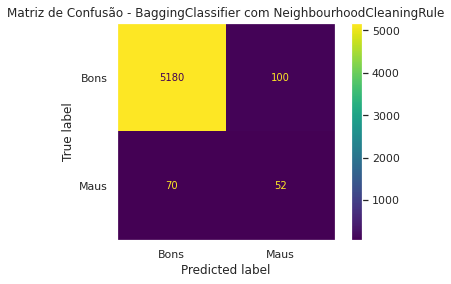

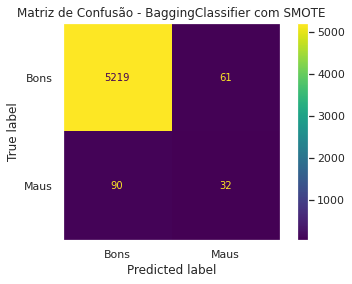

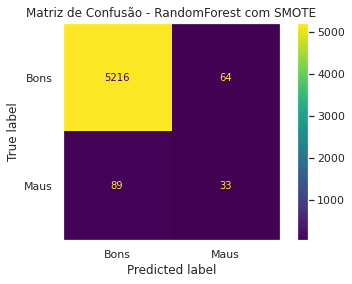


Classification Report - BaggingClassifier com NeighbourhoodCleaningRule
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5280
           1       0.34      0.43      0.38       122

    accuracy                           0.97      5402
   macro avg       0.66      0.70      0.68      5402
weighted avg       0.97      0.97      0.97      5402


Classification Report - BaggingClassifier com SMOTE
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5280
           1       0.34      0.43      0.38       122

    accuracy                           0.97      5402
   macro avg       0.66      0.70      0.68      5402
weighted avg       0.97      0.97      0.97      5402


Classification Report - RandomForest com SMOTE
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5280
           1       0.34      0.27      0.30       122

    accu

In [ ]:
# Treinando os modelos com os dados de treino
mod_Bag_ncr.fit(x_train_ncr, y_train_ncr)
mod_Bag_sm.fit(x_train_sm, y_train_sm)
mod_RFC.fit(x_train_sm, y_train_sm)

# Calculando a probabilidade
prob_predic_Bag_ncr = mod_Bag_ncr.predict_proba(x_test)
prob_predic_Bag_sm = mod_Bag_sm.predict_proba(x_test)
prob_predic_RFC = mod_RFC.predict_proba(x_test)
# Calculando o AUC
auc_Bag_ncr = roc_auc_score(y_test, prob_predic_Bag_ncr[:,1])
auc_Bag_sm = roc_auc_score(y_test, prob_predic_Bag_sm[:,1])
auc_RFC = roc_auc_score(y_test, prob_predic_RFC[:,1])
print(f'AUC BaggingClassifier com NeighbourhoodCleaningRule {auc_Bag_ncr}')
print(f'AUC BaggingClassifier com SMOTE                     {auc_Bag_sm}')
print(f'AUC RandomForest com SMOTE                          {auc_RFC}\n')

# Separando a probabilidade de ser bom e mau, e calculando o KS
data_bom_Bag_ncr = np.sort(mod_Bag_ncr.predict_proba(x_test)[:, 1])
data_mau_Bag_ncr = np.sort(mod_Bag_ncr.predict_proba(x_test)[:, 0])
kstest_Bag_ncr = stats.ks_2samp(data_bom_Bag_ncr, data_mau_Bag_ncr)
data_bom_Bag_sm = np.sort(mod_Bag_sm.predict_proba(x_test)[:, 1])
data_mau_Bag_sm = np.sort(mod_Bag_sm.predict_proba(x_test)[:, 0])
kstest_Bag_sm = stats.ks_2samp(data_bom_Bag_sm, data_mau_Bag_sm)
data_bom_RFC = np.sort(mod_RFC.predict_proba(x_test)[:, 1])
data_mau_RFC = np.sort(mod_RFC.predict_proba(x_test)[:, 0])
kstest_RFC = stats.ks_2samp(data_bom_RFC, data_mau_RFC)
print(f'KS BaggingClassifier com NeighbourhoodCleaningRule {kstest_Bag_ncr}')
print(f'KS BaggingClassifier com SMOTE                     {kstest_Bag_sm}')
print(f'KS RandomForest com SMOTE                          {kstest_RFC}\n')

# Criando matriz de confusão
matriz_confusao_Bag_ncr = plot_confusion_matrix(mod_Bag_ncr, x_test, y_test, values_format='.0f', display_labels=['Bons', 'Maus'])
plt.grid(False)
plt.title('Matriz de Confusão - BaggingClassifier com NeighbourhoodCleaningRule') 
plt.show(matriz_confusao_Bag_ncr)

matriz_confusao_Bag_sm = plot_confusion_matrix(mod_Bag_sm, x_test, y_test, values_format='.0f', display_labels=['Bons', 'Maus'])
plt.grid(False)
plt.title('Matriz de Confusão - BaggingClassifier com SMOTE') 
plt.show(matriz_confusao_Bag_sm)

matriz_confusao_RFC = plot_confusion_matrix(mod_RFC, x_test, y_test, values_format='.0f', display_labels=['Bons', 'Maus'])
plt.grid(False)
plt.title('Matriz de Confusão - RandomForest com SMOTE') 
plt.show(matriz_confusao_RFC)

# Fazendo a predicao dos dados de teste e calculando o classification report
pred_Bag_ncr = mod_Bag_ncr.predict(x_test)
pred_Bag_sm = mod_Bag_sm.predict(x_test)
pred_RFC = mod_RFC.predict(x_test)

print(color.BOLD+color.BLUE+color.UNDERLINE+'\nClassification Report - BaggingClassifier com NeighbourhoodCleaningRule'+color.END)
print(classification_report(y_test, pred_Bag_ncr, zero_division=0))

print(color.BOLD+color.BLUE+color.UNDERLINE+'\nClassification Report - BaggingClassifier com SMOTE'+color.END)
print(classification_report(y_test, pred_Bag_ncr, zero_division=0))

print(color.BOLD+color.BLUE+color.UNDERLINE+'\nClassification Report - RandomForest com SMOTE'+color.END)
print(classification_report(y_test, pred_RFC, zero_division=0))

In [ ]:
print(f'Registros Totais no Dataset:           {df_transformado_mod_final.shape[0]}')
print(f'Registros Separados para Treino:       {x_train.shape[0]}')
print(f'Registros Separados para Teste:         {x_test.shape[0]}')
print(f'Registros de Treino com Undersampling: {x_train_ncr.shape[0]}  -  Redução de   {x_train.shape[0] - x_train_ncr.shape[0]}')
print(f'Registros de Treino com Oversampling:  {x_train_sm.shape[0]}  -  Aumento de {x_train_sm.shape[0] - x_train.shape[0]}')

Registros Totais no Dataset:           21605
Registros Separados para Treino:       16203
Registros Separados para Teste:         5402
Registros de Treino com Undersampling: 15415  -  Redução de   788
Registros de Treino com Oversampling:  31678  -  Aumento de 15475


Vamos testar os modelos com os dados que ficaram separados (sem serem vistos durante o treino dos modelos), para verificar o desempenho antes de implementar o modelo final no ***StreamLit***.

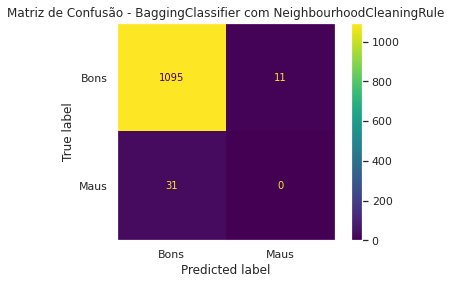

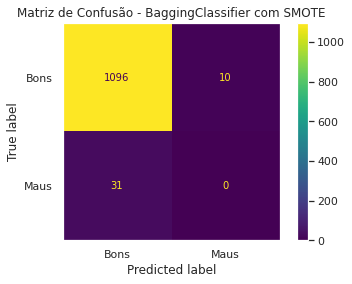

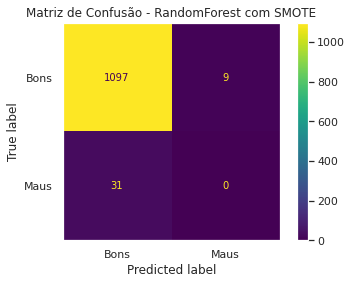

In [ ]:
x_columns = df_transformado_sep_final.columns
y = df_transformado_sep_final['Mau']
x = df_transformado_sep_final[x_columns].drop(['Mau'], axis=1)

# Criando matriz de confusão
matriz_confusao_Bag_ncr = plot_confusion_matrix(mod_Bag_ncr, x, y, values_format='.0f', display_labels=['Bons', 'Maus'])
plt.grid(False)
plt.title('Matriz de Confusão - BaggingClassifier com NeighbourhoodCleaningRule') 
plt.show(matriz_confusao_Bag_ncr)

matriz_confusao_Bag_sm = plot_confusion_matrix(mod_Bag_sm, x, y, values_format='.0f', display_labels=['Bons', 'Maus'])
plt.grid(False)
plt.title('Matriz de Confusão - BaggingClassifier com SMOTE') 
plt.show(matriz_confusao_Bag_sm)

matriz_confusao_RFC = plot_confusion_matrix(mod_RFC, x, y, values_format='.0f', display_labels=['Bons', 'Maus'])
plt.grid(False)
plt.title('Matriz de Confusão - RandomForest com SMOTE') 
plt.show(matriz_confusao_RFC)

O resultado ainda não está adequado...

Podemos ver que essa separação de dados gerou um *dataset* com 1137 clientes mas apenas 31 maus pagadores, ainda muito desabalanceado. Com isso, nosso modelo errou todas as previsões de mau pagador.

De qualquer forma, o modelo **`BaggingClassifier`** usando o **`NeighbourhoodCleaningRule`** apresentou o melhor resultado nos treinos e agora o desempenho com esses dados que ainda não tinham sido vistos foi muito parecido.

Vamos rodar diversas vezes cada modelo para analisar pela última vez o *score* médio e decidir qual modelo entrará em produção.

Para isso vamos criar uma função que roda diversas vezes o modelo refazendo a separação dos dados em treino e teste e armazena os valores da matriz de confusão, para obtermos o resultado médio de cada modelo.

In [ ]:
def roda_n_modelos(modelo, dados, n, sampler):
    x_columns = dados.columns
    y = dados['Mau']
    x = dados[x_columns].drop(['Mau'], axis = 1)

    auc_lista, lista_bom_certo, lista_fp, lista_fn, lista_mau_certo, lista_score = [],[],[],[],[],[]

    np.random.seed(SEED)

    for _ in range(n):
        x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y)

        if sampler == 'SMOTE':
            sm = SMOTE(random_state=SEED)
            x_train_sample, y_train_sample = sm.fit_resample(x_train, y_train)
        elif sampler == 'NCR':
            ncr = NeighbourhoodCleaningRule()
            x_train_sample, y_train_sample = ncr.fit_resample(x_train, y_train)

        modelo.fit(x_train_sample, y_train_sample)
        prob_predic = modelo.predict_proba(x_test)
        y_prev = modelo.predict(x_test)
        auc = roc_auc_score(y_test, prob_predic[:,1])
        auc_lista.append(auc)
        bom_certo, fp, fn, mau_certo = confusion_matrix(y_test, y_prev).ravel()
        score = (fn*peso_FN + fp*peso_FP)*-1
        lista_bom_certo.append(bom_certo)
        lista_fp.append(fp)
        lista_fn.append(fn)
        lista_mau_certo.append(mau_certo)
        lista_score.append(score)

    auc_medio = np.mean(auc_lista)
    auc_std = np.std(auc_lista)
    print(f'Resultados após {n} execuções')
    print(f'AUC Médio {auc_medio}')
    print(f'Intervalo {auc_medio - 2 * auc_std} a {auc_medio + 2 * auc_std}')
    print(f'Range     {4 * auc_std}')
    print('\n')
    print(color.BOLD+color.UNDERLINE+'Matriz de Confusão Média'+color.END)
    print(f'Crédito Aprovado para Bons Pagadores (Verdadeiro Negativo): {np.mean(lista_bom_certo)}'+color.GREEN+' <== ACERTOS'+color.END)
    print(f'Crédito Negado para Bons Pagadores (Falso Positivo)       :   {np.mean(lista_fp)}'+color.RED+' <== ERROS'+color.END)
    print(f'Crédito Aprovado para Maus Pagadores (Falso Negativo)     :   {np.mean(lista_fn)}'+color.RED+' <== ERROS'+color.END)
    print(f'Crédito Negado para Maus Pagadores (Verdadeiro Positivo)  :   {np.mean(lista_mau_certo)}'+color.GREEN+' <== ACERTOS'+color.END)
    print(color.BOLD+f' ===> Score Médio Obtido pelo Modelo: {np.mean(lista_score)}')

    #return auc_lista, lista_bom_certo, lista_fp, lista_fn, lista_mau_certo, lista_score


Com a função pronta, vamos criar e executar esses modelos.

In [ ]:
mod_Bag_ncr = BaggingClassifier(n_estimators=31, random_state=SEED)
mod_Bag_sm = BaggingClassifier(n_estimators=33, random_state=SEED)
mod_RFC = RandomForestClassifier(random_state=SEED)

In [ ]:
roda_n_modelos(mod_Bag_ncr,df_transformado_mod_final,100,'NCR')

Resultados após 100 execuções
AUC Médio 0.7530375139716842
Intervalo 0.7094598385096362 a 0.7966151894337321
Range     0.08715535092409597


Matriz de Confusão Média
Crédito Aprovado para Bons Pagadores (Verdadeiro Negativo): 5184.25 <== ACERTOS
Crédito Negado para Bons Pagadores (Falso Positivo)       :   95.75 <== ERROS
Crédito Aprovado para Maus Pagadores (Falso Negativo)     :   75.5 <== ERROS
Crédito Negado para Maus Pagadores (Verdadeiro Positivo)  :   46.5 <== ACERTOS
 ===> Score Médio Obtido pelo Modelo: -473.25


In [ ]:
roda_n_modelos(mod_Bag_sm,df_transformado_mod_final,100,'SMOTE')

Resultados após 100 execuções
AUC Médio 0.7275162770119225
Intervalo 0.6773227813747414 a 0.7777097726491035
Range     0.1003869912743621


Matriz de Confusão Média
Crédito Aprovado para Bons Pagadores (Verdadeiro Negativo): 5219.76 <== ACERTOS
Crédito Negado para Bons Pagadores (Falso Positivo)       :   60.24 <== ERROS
Crédito Aprovado para Maus Pagadores (Falso Negativo)     :   86.97 <== ERROS
Crédito Negado para Maus Pagadores (Verdadeiro Positivo)  :   35.03 <== ACERTOS
 ===> Score Médio Obtido pelo Modelo: -495.09


In [ ]:
roda_n_modelos(mod_RFC,df_transformado_mod_final,100,'SMOTE')

Resultados após 100 execuções
AUC Médio 0.7761076440635867
Intervalo 0.7374004967414521 a 0.8148147913857212
Range     0.07741429464426916


Matriz de Confusão Média
Crédito Aprovado para Bons Pagadores (Verdadeiro Negativo): 5224.52 <== ACERTOS
Crédito Negado para Bons Pagadores (Falso Positivo)       :   55.48 <== ERROS
Crédito Aprovado para Maus Pagadores (Falso Negativo)     :   89.07 <== ERROS
Crédito Negado para Maus Pagadores (Verdadeiro Positivo)  :   32.93 <== ACERTOS
 ===> Score Médio Obtido pelo Modelo: -500.83


#### **O que aprendemos nessa aula?**
---

>* **Função Para Rodar o Modelo:**
>
>  * Transformar Variáveis Categóricas Não Binárias em Categóricas Binárias;
>  * Explorar Métricas de Validação: AUC, KS, Matriz de Confusão e *Classification Report*;
>  * Criar *Pipeline* de Dados.
>
>* **Primeiros Modelos e** ***Oversampling:***
>
>  * Técnicas de Tratamento para Bases Desbalanceadas: *Undersampling* e *Oversampling*;
>  * Ajuste de Outros Algoritmos.
---












## **Aula 04 - Criando a Aplicação**
---


### **Vídeo 1 - Salvando o Melhor Modelo**

Ficou definido então que o melhor modelo (e que entrará em produção) é o que utiliza o **`BaggingClassifier`** com o *undersampling* **`NeighbourhoodCleaningRule`**.

Vamos então prepará-lo para a migração para o ***StreamLit***. Para isso precisamos definir o **Pipeline** e treinar o modelo agora com todos os dados que temos disponíveis, sem separar uma parte para treino e outra para teste.

In [ ]:
pipeline = Pipeline([('Transformador', Transformador(cols_quantitativas, cols_categoricas)),
                     ('sampling', NeighbourhoodCleaningRule()),
                     ('Modelo', BaggingClassifier(n_estimators=31, random_state=SEED))])

x = df_registro_clientes_targets.drop(['ID_Cliente', 'Mau'], axis=1)
y = df_registro_clientes_targets['Mau']

pipeline.fit(x,y)

Pipeline(steps=[('Transformador',
                 Transformador(colunas_categoricas=['Tem_Carro',
                                                    'Tem_Casa_Propria',
                                                    'Tem_email', 'Estado_Civil',
                                                    'Tem_telefone_trabalho',
                                                    'Tem_telefone_fixo',
                                                    'Categoria_de_renda',
                                                    'Ocupacao',
                                                    'Grau_Escolaridade',
                                                    'Moradia'],
                               colunas_continuas=['Idade', 'Qtd_Filhos',
                                                  'Rendimento_Anual',
                                                  'Anos_empregado',
                                                  'Tamanho_Familia'])),
                ('sampling', Neighbourho

Com o modelo treinado, precisamos exportá-lo, juntamente com as informações de colunas que o modelo trabalha e as possíveis respostas para nossas colunas categóricas.

Para isso iremos utilizar a biblioteca **`joblib`**.

In [ ]:
from joblib import dump

In [ ]:
dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

In [ ]:
features = x.columns
features

Index(['Idade', 'Qtd_Filhos', 'Rendimento_Anual', 'Anos_empregado',
       'Tamanho_Familia', 'Tem_Carro', 'Tem_Casa_Propria',
       'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
       'Categoria_de_renda', 'Grau_Escolaridade', 'Estado_Civil', 'Moradia',
       'Ocupacao'],
      dtype='object')

In [ ]:
dump(features,'features.joblib')

['features.joblib']

In [ ]:
lista_campos = df_registro_clientes_targets[cols_categ_nao_binarias].apply(lambda x: x.unique(), axis=0)
lista_campos

Categoria_de_renda    [Empregado, Associado comercial, Pensionista, ...
Grau_Escolaridade     [Ensino medio, Ensino superior, Ensino superio...
Estado_Civil          [Casado, Solteiro, Separado, Uniao estavel, Vi...
Moradia               [Casa propria, Alugado, Habitacao publica, Mor...
Ocupacao              [Seguranca, Venda, Outros, Contabilidade, Cons...
dtype: object

In [ ]:
dump(lista_campos,'lista_campos.joblib')

['lista_campos.joblib']

Os 3 arquivos gerados devem ser baixados para poder passar à próxima fase, onde iremos usar uma **IDE** (*VS Code*) para preparar os arquivos que serão utilizados pelo ***StreamLit***.

As próximas aulas (**vídeos 3, 4 e 5**) foram acompanhadas já usando o **VS Code** e o acesso ao ***Streamlit***, por isso não terão seu código aqui no *Colab*.

O repositório gerado a partir dessas aulas poderá ser encontrado [aqui](https://github.com/gcochlar/Avaliacao_Credito), enquanto o site com a aplicação de avaliação de crédito ativa pode ser encontrado [aqui]().

Para efeitos de teste, caso queiram encontrar uma combinação de informações que o modelo considera como provável mau pagador, podem ser utilizados os dados abaixo, de um cliente de nosso *dataset*.

In [ ]:
#df_registro_clientes_targets.query('Mau == 1')
df_registro_clientes_targets.loc[871]

ID_Cliente                        5010535
Idade                               38.00
Qtd_Filhos                              2
Rendimento_Anual                135000.00
Anos_empregado                       8.40
Tamanho_Familia                      4.00
Tem_Carro                               1
Tem_Casa_Propria                        0
Tem_telefone_trabalho                   0
Tem_telefone_fixo                       0
Tem_email                               0
Categoria_de_renda              Empregado
Grau_Escolaridade            Ensino medio
Estado_Civil                       Casado
Moradia                      Casa propria
Ocupacao                 Construcao Civil
Mau                                     1
Name: 871, dtype: object

#### **O que aprendemos nessa aula?**
---

>* **O Melhor Modelo:**
>
>  * Construção do *pipeline* com os dados;
>  * Escolher o melhor modelo;
>  * Treinamento do melhor modelo com todos os dados;
>  * Salvar o melhor modelo para usar em outra ferramenta.
>
>* **Criando a Interface**
>
>  * Uso do **VS Code** e do **Git para Desktop**;
>  * Uso do ***Streamlit*** para gerar interface e colocar em produção.
---










